In [105]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import missingno as msno

from scipy import stats 
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, kstest, yeojohnson, boxcox

from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Enoncé

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s'intérresse de près à la consommation et aux émissions des bâtiments non destinés à l'habitation.

## Mission

Vous voulez tenter de prédire les émissions de CO2 et la consommation totale d'énergie de bâtiments non destinés à l'habitation pour lesquels elles n'ont pas encore été mesurées.

Vous cherchez également à éveluer l'intérêt de l'ENERGY STAR Score pour la prédiction d'émissions.

1. Réaliser une courte analyse exploratoire.
2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

## Définition des variables
- **OSEBuildingID** : Identifiant unique assigné à un bâtiment
- **DataYear** : Année d'enregistrement des données
- **BuildingType** : Type de bâtiment (Résidentiel ou autre)
- **PrimaryPropertyType** : Usage principal du bâtiment (Hôtel, École...)
- **PropertyName** : Nom du bâtiment
- **Address** : L'adresse du bâtiment
- **City** : La ville où est situé le bâtiment
- **State** : L'état où est situé le bâtiment
- **ZipCode** : Code postal (peut être différent même dans un même état)
- **TaxParcelIdentificationNumber** : Numéro d'identification fiscale
- **CouncilDistrictCode** : Code du district du conseil de la ville de Seattle
- **Neighborhood** : Le quartier où est situé le bâtiment
- **Latitude** : La latitude du bâtiment
- **Longitude** : La longitude du bâtiment
- **YearBuilt** : Date de création ou de rénovation du bâtiment
- **NumberofBuildings** : Nombre de bâtiments dans la propriété
- **NumberofFloors** : Nombre d'étages
- **PropertyGFATotal** : Surface brute de plancher totale du bâtiment et du parking
- **PropertyGFAParking** : Espace brut de tous les types de stationnement
- **PropertyGFABuilding(s)** : Surface brute du bâtiment
- **ListOfAllPropertyUseTypes** : Types d'utilisation de la propriété
- **LargestPropertyUseType** : Type d'utilisation principale de la propriété
- **LargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation principale)
- **SecondLargestPropertyUseType** : Type d'utilisation secondaire de la propriété
- **SecondLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation secondaire)
- **ThirdLargestPropertyUseType** : Type d'utilisation tertiaire de la propriété
- **ThirdLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation tertiaire)
- **YearsENERGYSTARCertified** : Année à laquelle la propriété a reçu la certification ENERGYSTAR
- **ENERGYSTARScore** : Une note de 1 à 100 qui évalue la performance énergétique globale d'un bien immobilieConsommation d'énergie d'un bien immobilier divisée par sa surface brute de plancherfactures des services publics
- **SiteEUIWN(kBtu/sf)** : SiteEUI(kBtu/sf) normalisée en fonction des conditions météorologiques
- **SourceEUI(kBtu/sf)** : Énergie annuelle consommée d'un bien immobilier (y compris les pertes) / Surface brute de plancher
- **SourceEUIWN(kBtu/sf)** : SourceEUI(kBtu/sf) normalisée en fonction des conditions météorologiques
- **SiteEnergyUse(kBtu)** : Quantité annuelle d'énergie consommée par le bien, toutes sources d'énergie confondues
- **SiteEnergyUseWN(kBtu)** : SiteEnergyUse(kBtu) normalisée en fonction des conditions météorologiques
- **SteamUse(kBtu)** : Quantité annuelle de vapeur urbaine consommée
- **Electricity(kWh)** : Quantité annuelle d'électricité consommée
- **Electricity(kBtu)** : Electricity mais en British thermal units (kBtu)
- **NaturalGas(therms)** : Quantité annuelle de gaz naturel consommée (therms)
- **NaturalGas(kBtu)** : NaturalGas mais en British thermal units (kBtu).
- **DefaultData** : Utilisation de valeurs par défaut (fausses valeurs) sur certaines features pour le bâtiment ?
- **Comments** : Commentaires du propriétaire ajoutant du contexte sur les valeurs des features
- **ComplianceStatus** : Si un bien immobilier a satisfait aux exigences de l'analyse comparative de la consommation d'énergie pour l'année de référence en cours.
- **Outlier** : Si un bien est une valeur aberrante élevée ou faible (O/N)
- **TotalGHGEmissions** : Quantité totale d'émissions de gaz à effet de serre rejetée dans l'atmosphère en raison de la consommation d'énergie du bien
- **GHGEmissionsIntensity** : TotalGHGEmissi
 / Surface brute de plancher de la propriété



## I- Visualisation des données

In [106]:
# Charger le fichier
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [107]:
# Afficher le dataset pour vérifier les données
print(df.head())
print(df.tail())

   OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   


In [108]:
# Combien de lignes et de colonnes sont contenus dans df
print('Shape : ' + str(df.shape))

Shape : (3376, 46)


In [109]:
# Affichage du nom des colonnes, du type des colonnes et du nombre de variable par type
print(df.info(verbose=True))
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

<Axes: >

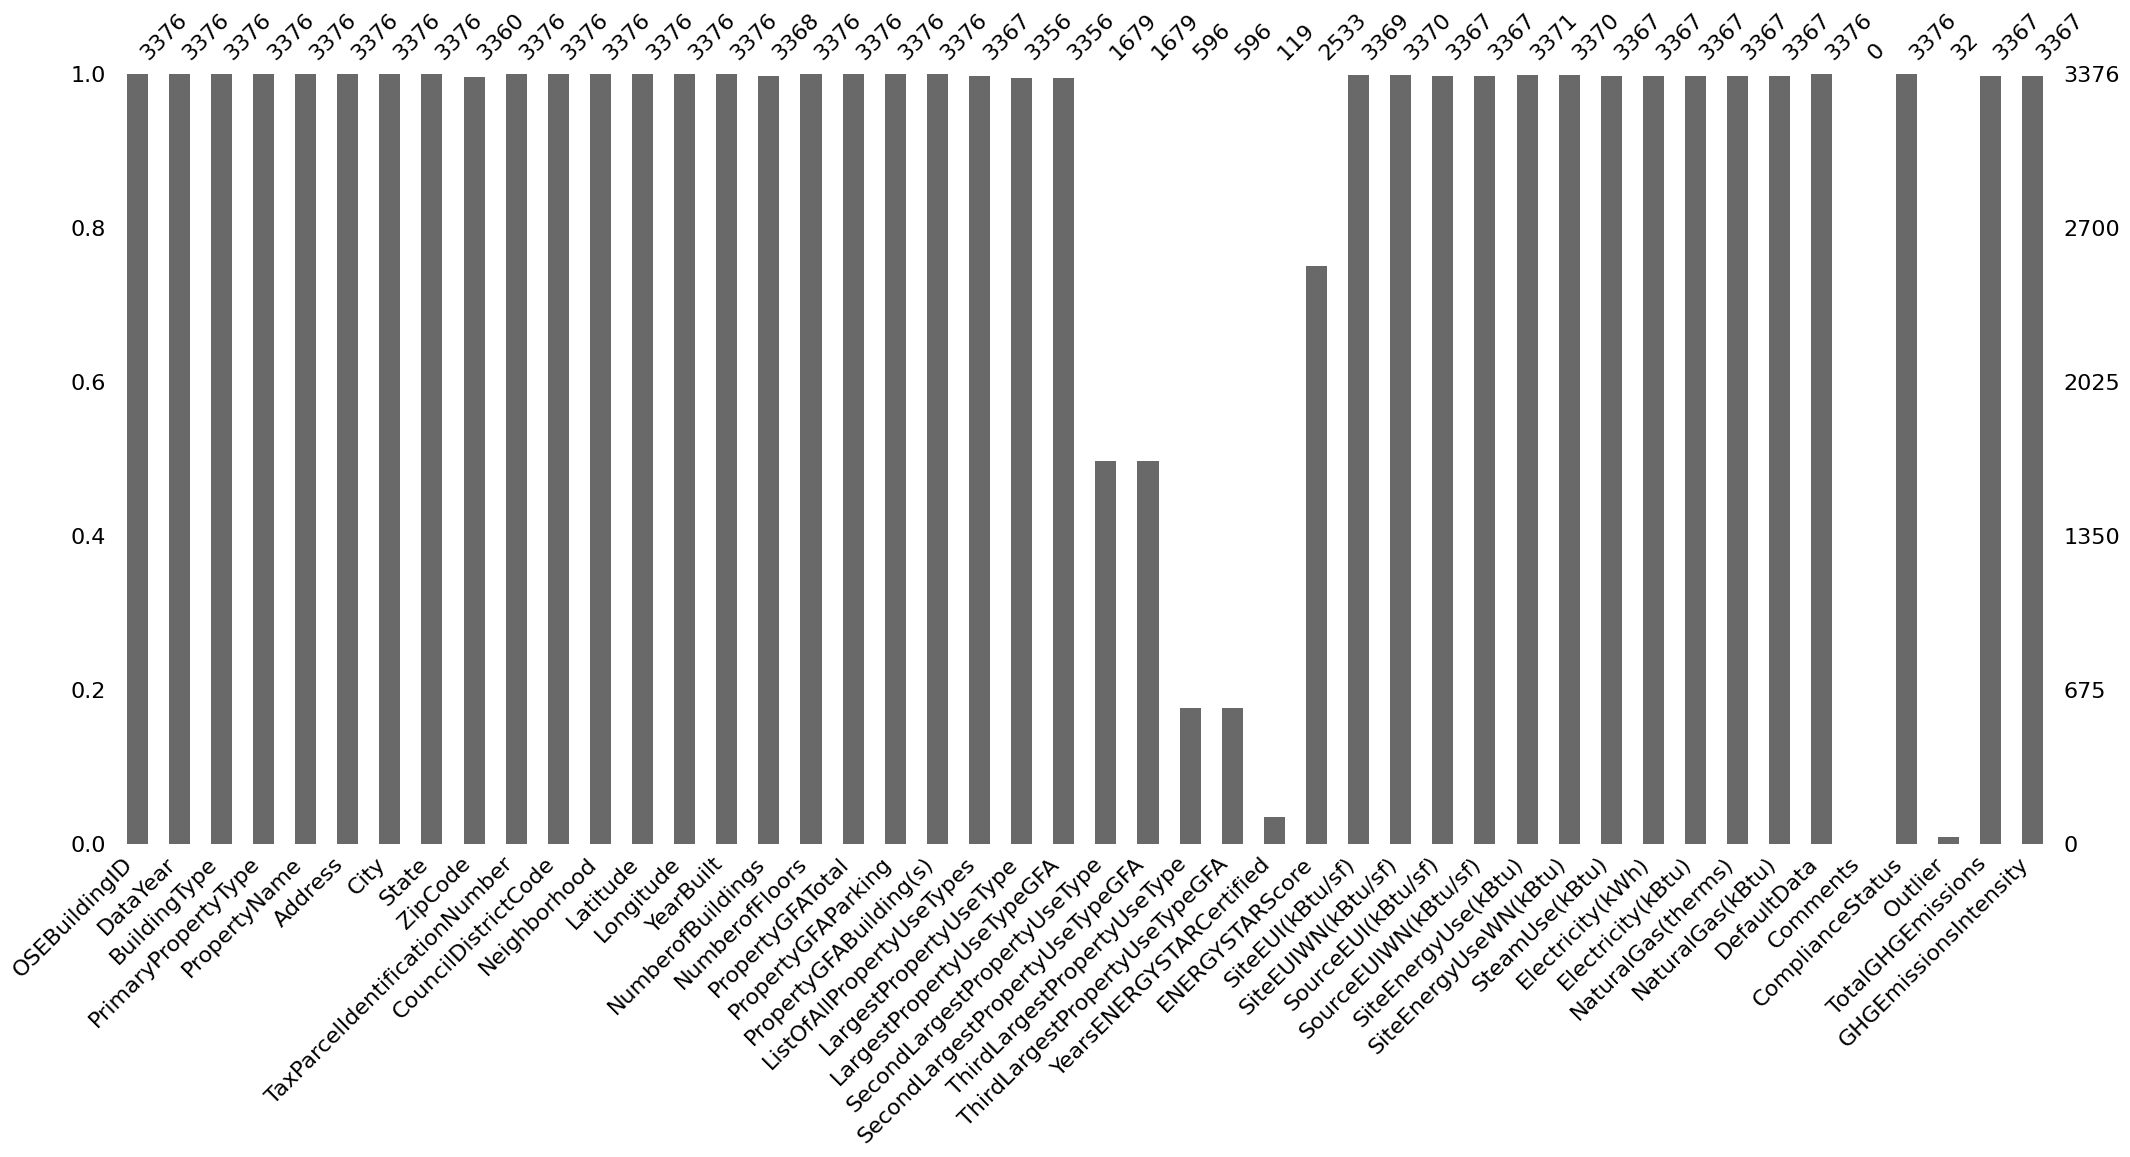

In [110]:
# Existe-t-il des valeurs manquantes dans ce jeu de données ?
print(df.isna().mean().sort_values())
msno.bar(df)

In [111]:
#Existe-t-il des lignes en double ?
print('Le jeu de données comporte ' + str(df['OSEBuildingID'].duplicated().sum()) + ' doublons')

Le jeu de données comporte 0 doublons


In [112]:
#Combien y a-t-il de valeurs différentes par colonne ?
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [113]:
# Statistiques descriptives
df.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  ...  SiteEnergyUse(kBtu)  \
count     3376.000000      3.376000e+03  ...         3.371000e+03   
mean         4.709123      9.483354e+04  ...         5.403667e+06   
std          5.494465      2.188376e+05  ...         2.161063e+07   
min          0.000000      1.128500e+04  ...         0.000000e+00   
25%          2.000000      2.848700e+04  ...         9.251286e+05   
50%          4.000000      4.417500e+04  ...         1.803753e+06   
75%          5.000000      9.099200e+04  ...         4.222455e+06   
max         99.000000      9.320156e+06  ...         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.370000e+03    3.367000e+03      3.367000e+03   
mean            5.276726e+06    2.745959e+05      1.086639e+06   
std             1.593879e+07    3.912173e+06      4.352478e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%             9.701822e+05    0.000000e+00      1.874229e+05   
50%             1.904452e+06    0.000000e+00      3.451299e+05   
75%             4.381429e+06    0.000000e+00      8.293178e+05   
max             4.716139e+08    1.349435e+08      1.925775e+08   

       Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  Comments  \
count       3.367000e+03        3.367000e+03      3.367000e+03       0.0   
mean        3.707612e+06        1.368505e+04      1.368505e+06       NaN   
std         1.485066e+07        6.709781e+04      6.709781e+06       NaN   
min        -1.154170e+05        0.000000e+00      0.000000e+00       NaN   
25%         6.394870e+05        0.000000e+00      0.000000e+00       NaN   
50%         1.177583e+06        3.237538e+03      3.237540e+05       NaN   
75%         2.829632e+06        1.189033e+04      1.189034e+06       NaN   
max         6.570744e+08        2.979090e+06      2.979090e+08       NaN   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000  

[8 rows x 30 columns]

Pour ce projet, nos objectifs sont : 
- La prédiction des émissions de CO2
- La consommation totale d'énergie des bâtiments non destinés à l'habitation
- Evaluer l'intérêt de l'ENERGYSTARScore' pour la prédiction d'émission.

Nos variables cibles vont donc être : 
- **TotalGHGEmissions** : Quantité totale d'émissions de gaz à effet de serre rejetée dans l'atmosphère en raison de la consommation d'énergie du bien
- **SiteEnergyUseWN(kBtu)** : Quantité annuelle d'énergie consommée par le bien, toutes sources d'énergie confondues, normalisée en fonction des conditions météorologiques.
- **ENERGYSTARScore** : Une note de 1 à 100 qui évalue la performance énergétique globale d'un bien immobilier.

## II- Nettoyage des données

### 1) Suppression des lignes duppliquées

la variable 'OSEBuildingID' est un identifiant unique attribué à chaque propriété à des fins de suivi et d'identification. On va se baser sur cette variable pour vérifier s'il y a des doublons dans notre dataset.

In [114]:
#Nombre de doublons
doublons = df.duplicated(subset=['OSEBuildingID']).sum()
print('Le nombre de doublons dans df est de : ' + str(doublons))

#Supprimer les doublons
df = df.drop_duplicates(subset=['OSEBuildingID'], keep='first')
print('Le jeu de données comporte après traitement ' + str(df.shape[0]) + ' lignes.')

Le nombre de doublons dans df est de : 0
Le jeu de données comporte après traitement 3376 lignes.


### 2) Suppression des bâtiments destinés à l'habitation
On veut prédire les émissions de CO2 et la consommation totale d'énergie de bâtiments non destinés à l'habitation. On supprime donc les lignes dont la catégorie de bâtiments est destinée à l'habitation

In [115]:
# Sont-ils tous des bâtiments non destinés à l'habitation ? 
print(df['BuildingType'].unique())

#Suppression des bâtiments destinés à l'habitation ('Multifamily')
batiment_habitation = df['BuildingType'].isin(['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)'])

print(df.shape)
print('Le nombre de bâtiments destinés à l\'habitation supprimé est de : ' + str(batiment_habitation.sum()))

df = df[~batiment_habitation]
print(df.shape)

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']
(3376, 46)
Le nombre de bâtiments destinés à l'habitation supprimé est de : 1708
(1668, 46)


### 3) PrimaryPropertyType

['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Distribution Center' 'Worship Facility'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Restaurant' 'Low-Rise Multifamily' 'Office']


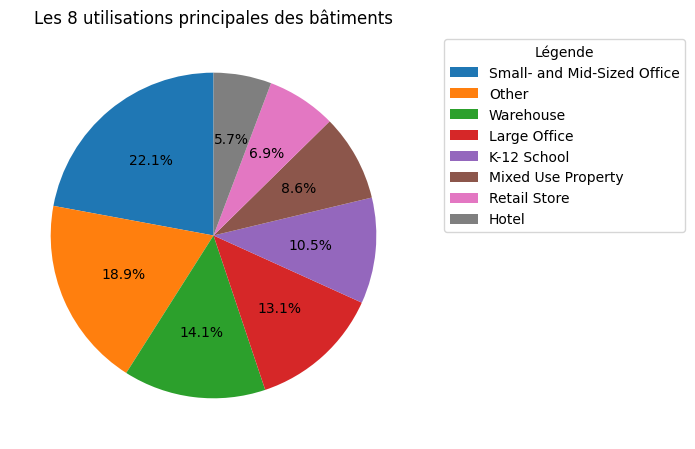

BuildingType
NonResidential    78
Campus             1
Name: count, dtype: int64


In [116]:
# Quelle est l'utilisation principale de ces bâtiments ?
print(df['PrimaryPropertyType'].unique())

#Représentation graphique
utilisation_principale = df['PrimaryPropertyType'].value_counts().head(8)
plt.figure()
plt.pie(utilisation_principale, labels = None, autopct='%1.1f%%', startangle=90)
plt.title('Les 8 utilisations principales des bâtiments')
plt.legend(utilisation_principale.index, title='Légende',  bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plus de détail sur l'utilisation 'Hotel'
hotel = df.loc[(df['PrimaryPropertyType'] == 'Hotel') | (df['PrimaryPropertyType'] == 'Low-Rise Multifamily')]
print(hotel['BuildingType'].value_counts())

On pouvait penser que les lignes ayant pour utilisation principale 'Hotel' ou encore 'Low-Rise Multifamily' étaient à supprimer mais leur 'BuildingType' est bien 'NonResidential'. On les conserve.

La variable 'PrimaryPropertyType' va être intérressante pour la modélisation mais possèdent trop de valeurs uniques dont certaines très similaires. On les regroupe.

In [117]:
df.loc[(df['PrimaryPropertyType'] == 'K-12 School') | (df['PrimaryPropertyType'] == 'University'), 'PrimaryPropertyType'] = 'Education'
df.loc[(df['PrimaryPropertyType'] == 'Small- and Mid-Sized Office') | (df['PrimaryPropertyType'] == 'Large Office'), 'PrimaryPropertyType'] = 'Office'
df.loc[(df['PrimaryPropertyType'] == 'Laboratory') |(df['PrimaryPropertyType'] == 'Medical Office') | (df['PrimaryPropertyType'] == 'Senior Care Community'), 'PrimaryPropertyType'] = 'Medical'
df.loc[(df['PrimaryPropertyType'] == 'Self-Storage Facility') | (df['PrimaryPropertyType'] == 'Warehouse') | (df['PrimaryPropertyType'] == 'Refrigerated Warehouse'), 'PrimaryPropertyType'] = 'Warehouse'
print(df['PrimaryPropertyType'].unique())

['Hotel' 'Other' 'Mixed Use Property' 'Education' 'Office' 'Warehouse'
 'Medical' 'Retail Store' 'Hospital' 'Residence Hall'
 'Distribution Center' 'Worship Facility' 'Supermarket / Grocery Store'
 'Restaurant' 'Low-Rise Multifamily']


### 4) Suppression des variables inutilisées/redondantes

### _**Variables inutilisées**_

 - **'OSEBUildingID'** : Les doublons sont détectés, cette variable n'est plus nécessaire.
 - **'DataYear'** : 2016 est l'unique année pour toutes nos données.
 - **'Address'** : L'adresse du bâtiment
 - **'Latitude'** : les valeurs .min et .max de cette variable se situe dans les coordonnées de Seattle
 - **'Longitude'** : les valeurs .min et .max de cette variable se situe dans les coordonnées de Seattle
 - **'ZipCode'** : on utilisera Neighborhood, celle-ci est donc inutile.
 - **'BuildingType'** : Les bâtiments destinés à l'habitation ont été supprimés, cette variable n'est plus utile.
 - **'PropertyName'** : identifiant unique de la maison, cela n'est pas utile.
 - **'City'** : Seattle est l'unique ville pour nos données.
 - **'State'** : 'WA' est l'unique valeur pour toutes nos données.
 - **'TaxParcelIdentificationNumber'** : Numéro d'identification de la parcelle ficale, encore un identifiant (inutile).
 - **'CouncilDistrictCode'** : Propriété District du conseil de la ville de Seattle, on ne l'utilisera pas.
 - **'YearsENERGYSTARCertified'** : Année à laquelle la propriété a reçu la certification ENERGYSTAR (inutile).
 - **'Comments'** : Cette variable a 100% de valeur manquante.

In [118]:
#Suppression des variables inutilisées
df.drop(columns=['OSEBuildingID',
                 'DataYear',
                 'Address',
                 'Latitude',
                 'Longitude',
                 'ZipCode',
                 'BuildingType', 
                 'PropertyName', 
                 'City',
                 'State', 
                 'TaxParcelIdentificationNumber', 
                 'CouncilDistrictCode',
                 'YearsENERGYSTARCertified',
                 'Comments'], inplace=True)

### _**Variables redondantes**_

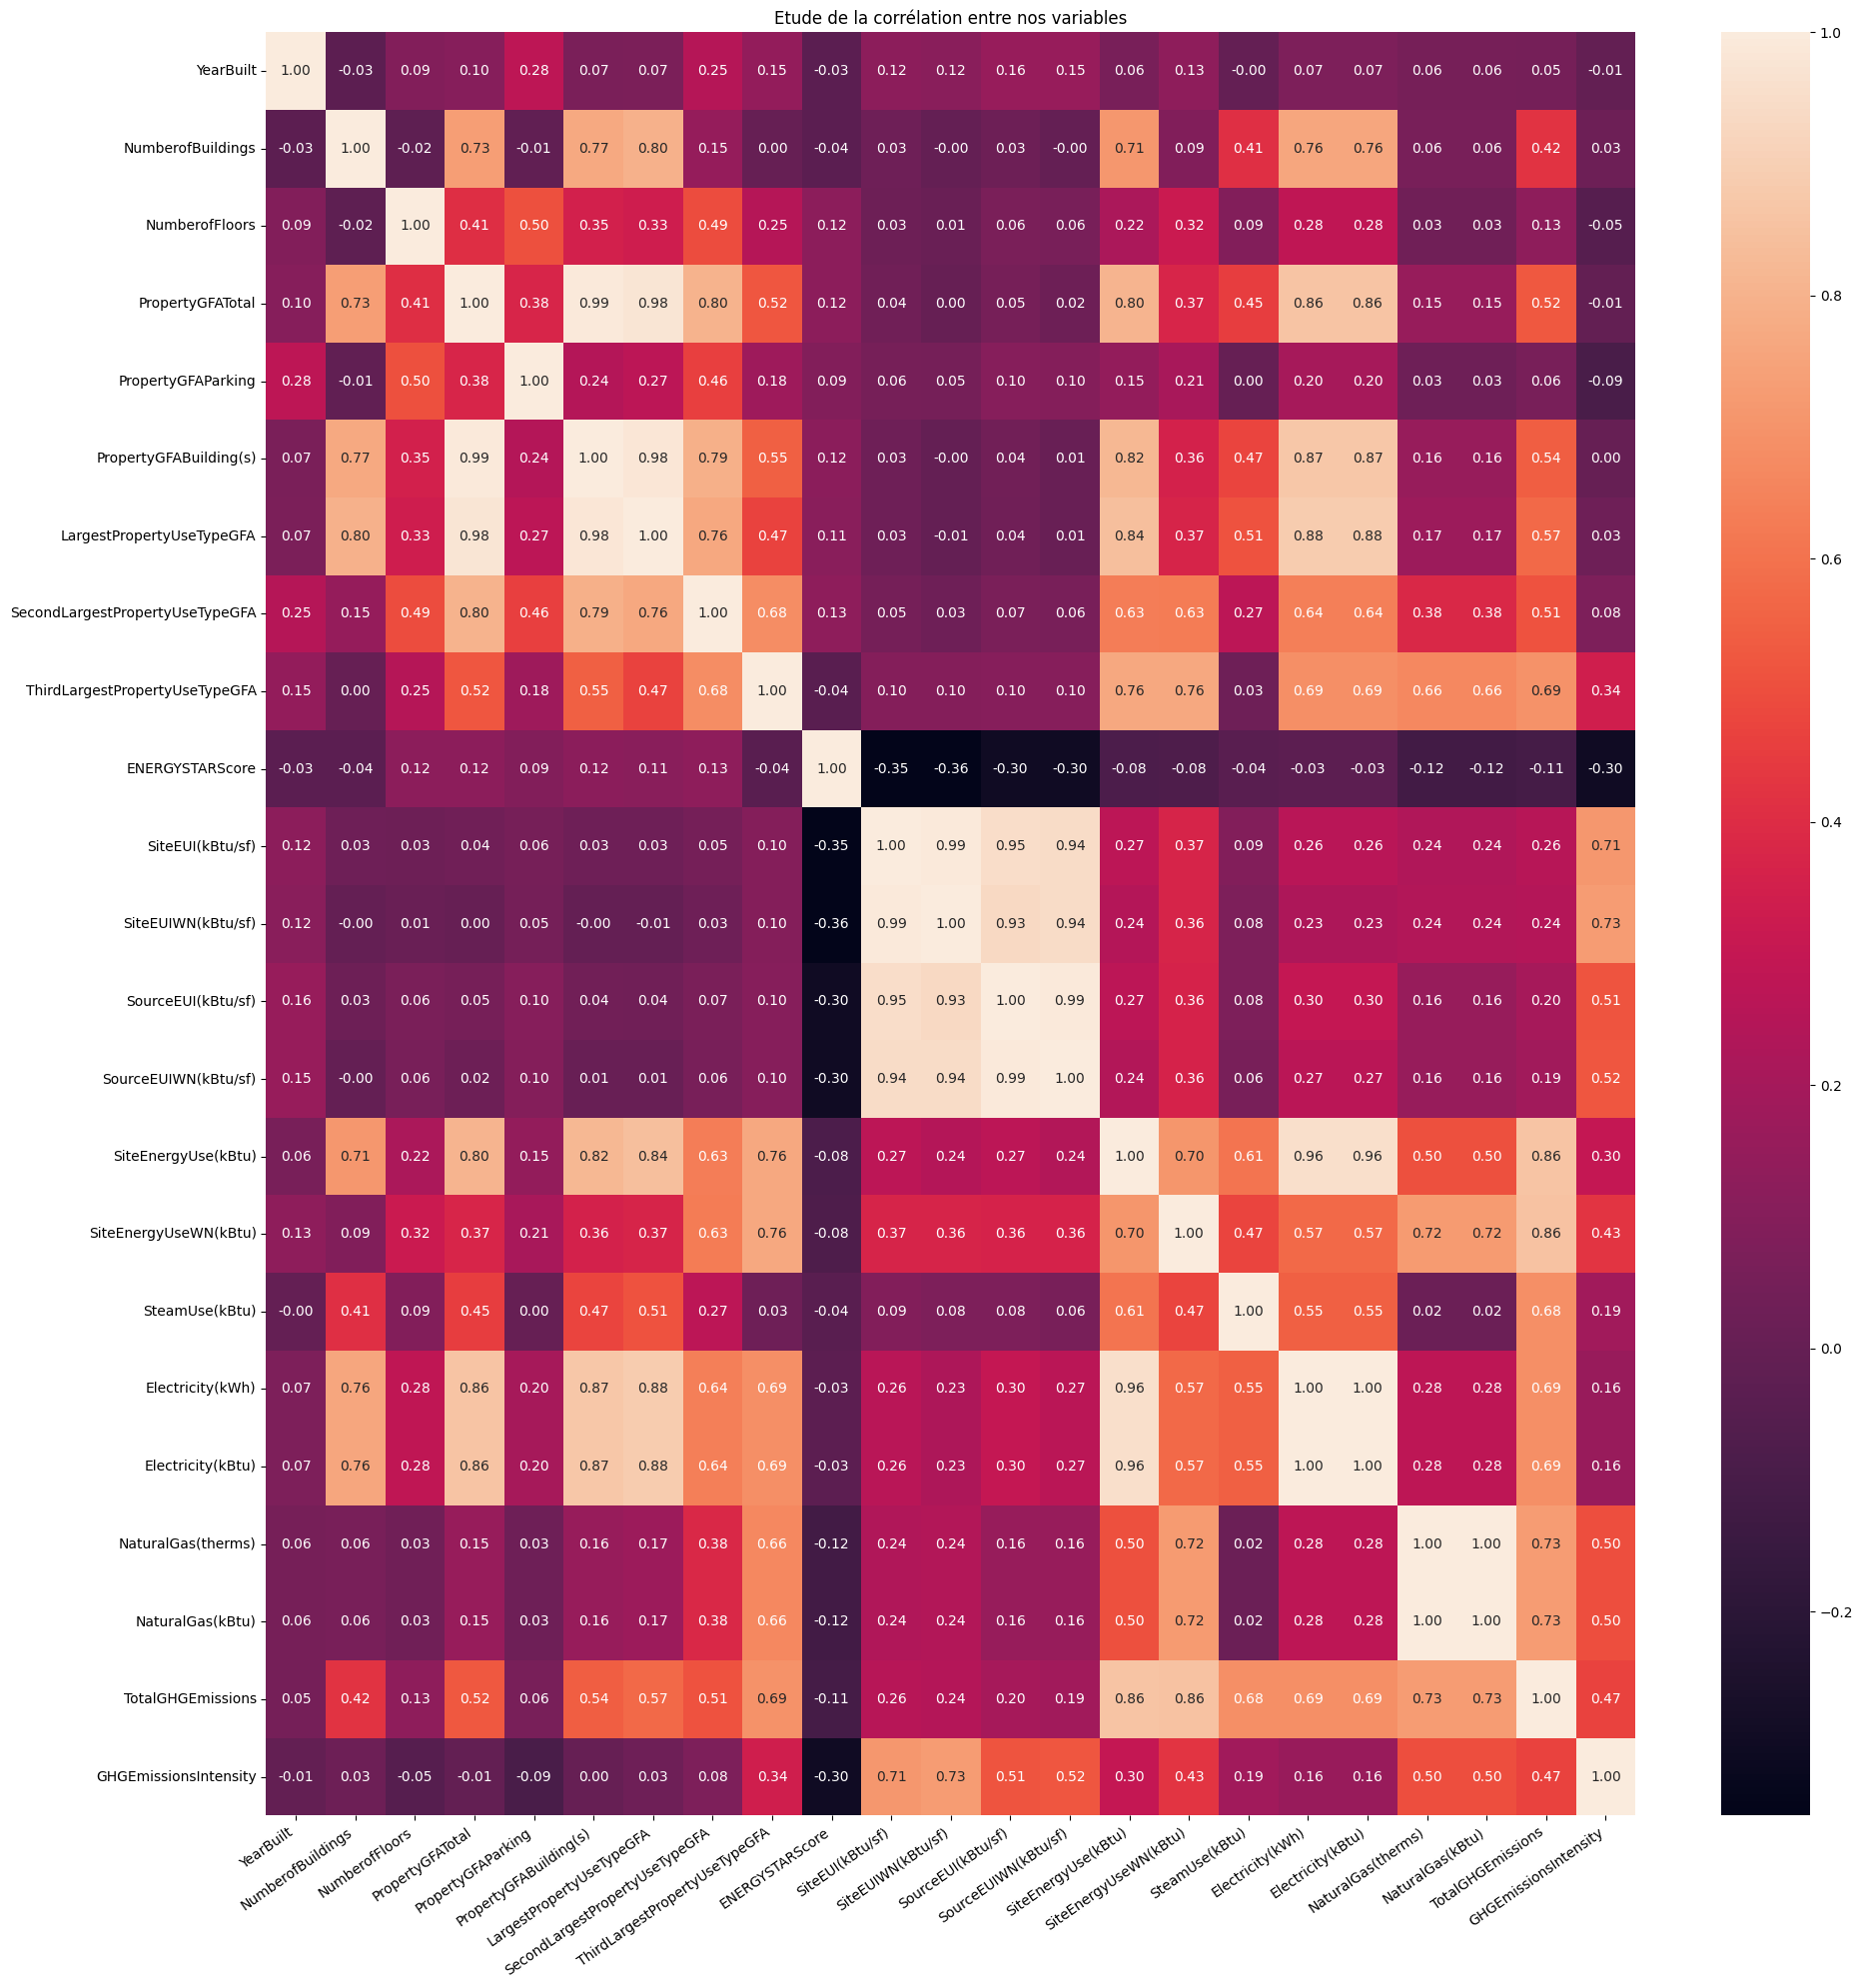

In [119]:
colonnes_quanti = df.select_dtypes(include=['float64',  'int64']).columns

#Matrice de corrélation 
plt.figure(figsize=(20,20))
sns.heatmap(df[colonnes_quanti].corr(), annot=True, fmt='.2f')
plt.title('Etude de la corrélation entre nos variables')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

Certaines variables très fortement corrélées sont redondantes, garder les deux serait inutile :
- _**'SiteEUI(kBtu/sf)' et 'SiteEUIWN(kBtu/sf)'**_ : Très forte corrélation entre les deux (0.94). On conserve la variable 'SiteEUIWN(kBtu/sf)' normalisées en fonction des conditions météorologiques (plus précis).
- **SourceEUI(kBtu/sf)** et **SourceEUIWN(kBtu/sf)** : Pratiquement totalement corrélée (0.99). On conserve la variable SourceEUIWN(kBtu/sf) normalisée en fonction des conditions météorologiques.
- **'NaturalGas(kBtu)' et 'NaturalGas(therms)'** : Ces variables sont totalement corrélées (même valeurs dans 2 unités différentes). On ne garde que 'NaturalGas(kBtu)'
- **'Electricity(kWh)' et 'Electricity(kBtu)'** : Ces variables sont totalement corrélées (même valeurs dans 2 unités différentes). On ne garde que 'Electricity(kBtu)'

In [120]:
#Suppression des colonnes redondantes
df.drop(columns=['SiteEUI(kBtu/sf)',
                 'SourceEUI(kBtu/sf)',
                 'NaturalGas(therms)', 
                 'Electricity(kWh)'], inplace=True)

### 5) Variables 'ComplianceStatus', 'Outlier', 'DefaultData'

In [121]:
print(df['ComplianceStatus'].value_counts())
print(df['Outlier'].value_counts())
print(df['DefaultData'].value_counts())

ComplianceStatus
Compliant                       1548
Error - Correct Default Data      88
Non-Compliant                     18
Missing Data                      14
Name: count, dtype: int64
Outlier
Low outlier     15
High outlier     2
Name: count, dtype: int64
DefaultData
False    1580
True       88
Name: count, dtype: int64


- La variable 'ComplianceStatus' permet de savoir si un bien immobilier satisfait aux exigences de l'analyse comparative de la consommation d'énergie pour l'année de référence en cours. On ne garde que les bâtiments avec des données 'compliant'/conformes.
- Les lignes présentent dans la variable 'Outlier' indique la présence de valeurs aberrantes. On supprime ces lignes .
- 'DefaultData' indique l'utilisation de valeurs par défaut (fausses valeurs) sur certaines features pour le bâtiment. On supprime les lignes avec des valeurs par défaut.

In [122]:
# On ne garde que les bâtiments sans outliers
df = df[pd.isna(df['Outlier'])]

# On ne garde que les bâtiments sans valeur par défaut
df = df.loc[df['DefaultData'] == False]

# On ne garde que les bâtiments avec des données 'Compliant'
df = df.loc[df['ComplianceStatus'] == 'Compliant']

# Ces variables ne sont plus utiles, on les supprime
df.drop(columns=['ComplianceStatus', 'Outlier', 'DefaultData'], inplace=True)

### 6) Suppression des valeurs aberrantes

### _**Visualisation des données**_

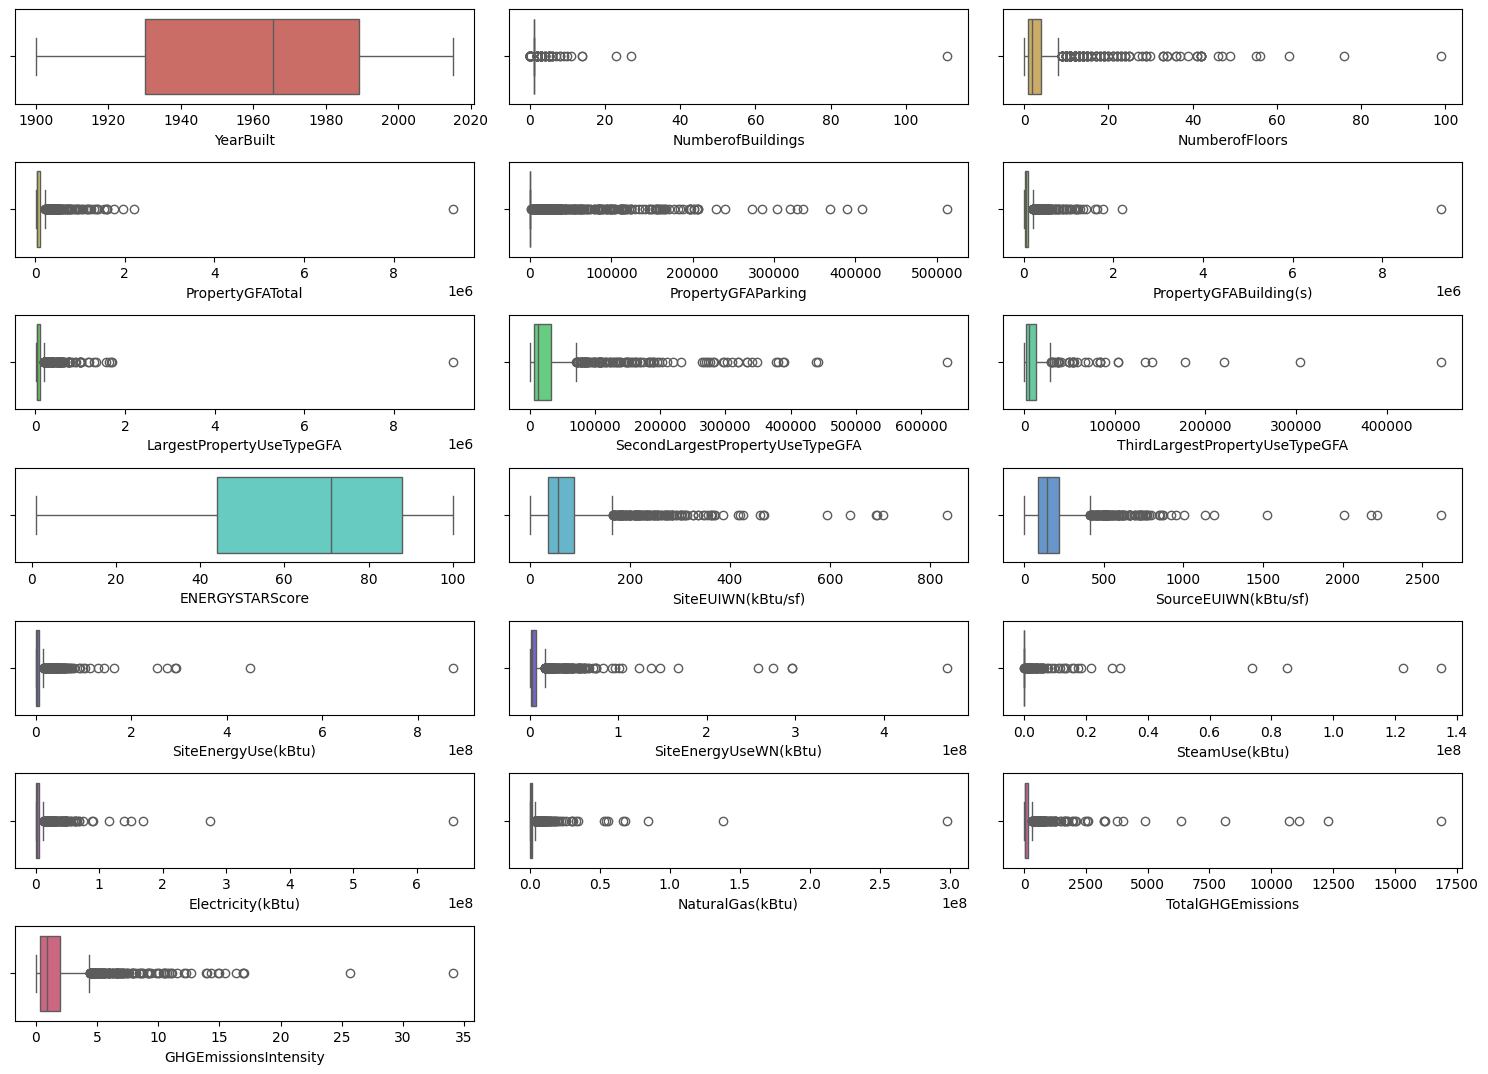

YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1548.000000        1548.000000     1548.000000      1.548000e+03   
mean   1961.644057           1.178941        4.276486      1.213321e+05   
std      32.886918           3.039221        6.780694      3.062944e+05   
min    1900.000000           0.000000        0.000000      1.128500e+04   
25%    1930.000000           1.000000        1.000000      2.884325e+04   
50%    1965.500000           1.000000        2.000000      4.815900e+04   
75%    1989.000000           1.000000        4.000000      1.076615e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1548.000000            1.548000e+03               1.544000e+03   
mean         13842.337209            1.074898e+05               9.994564e+04   
std          43721.822291            2.926272e+05               2.855014e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.793675e+04               2.501575e+04   
50%              0.000000            4.608400e+04               4.204300e+04   
75%              0.000000            9.556825e+04               9.203675e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       842.000000                      348.000000   
mean                      36342.497977                    14998.889077   
std                       66631.152358                    37037.015147   
min                           0.000000                        0.000000   
25%                        5564.250000                     2624.250000   
50%                       12062.500000                     5965.500000   
75%                       31820.250000                    12965.500000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count       997.000000         1547.000000           1548.000000   
mean         63.635908           77.525857            185.360271   
std          28.825309           76.235063            187.995700   
min           1.000000            0.000000             -2.100000   
25%          44.000000           37.000000             84.225002   
50%          71.000000           56.299999            141.800003   
75%          88.000000           87.900002            215.749996   
max         100.000000          834.400024           2620.000000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count         1.548000e+03           1.547000e+03    1.548000e+03   
mean          8.860058e+06           8.441981e+06    5.511831e+05   
std           3.130568e+07           2.277676e+07    5.718502e+06   
min           5.713320e+04           0.000000e+00    0.000000e+00   
25%           1.251083e+06           1.322090e+06    0.000000e+00   
50%           2.732167e+06           2.824097e+06    0.000000e+00   
75%           7.294487e+06           7.470130e+06    0.000000e+00   
max           8.739237e+08           4.716139e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
count       1.548000e+03      1.548000e+03        1548.000000   
mean        6.140840e+06      2.038297e+06         193.608908   
std         2.151071e+07      9.710667e+06         779.105278   
min        -1.154170e+05      0.000000e+00          -0.800000   
25%         7.308642e+05      0.000000e+00          20.655000   
50%         1.746086e+06      4.881350e+05          49.845000   
75%         5.264935e+06      1.530812e+06         147.227500   
max         6.570744e+08      2.979090e+08       16870.980000   

       GHGEmissionsIntensity  
count            1548.000000  
mean                1.667358  
std                 2.407577  


In [123]:
colonnes_quanti = df.select_dtypes(include=['float64',  'int64']).columns

#Représentation graphique des ces données
palette = sns.color_palette("hls", len(colonnes_quanti))

plt.figure(figsize=(15, 15))
for i, colonne in enumerate(colonnes_quanti):
    plt.subplot(10, 3, i+1)
    sns.boxplot(x=df[colonne], color=palette[i])
plt.tight_layout()
plt.show()

#Statistiques descriptives 
df.describe()

### _**Variables cibles**_
Nos 3 variables de prédiction ne doivent pas avoir de valeur par défaut que l'on pourrait obtenir par imputation, au risque de biaiser leur performance de prédiction. On supprime donc les lignes n'ayant pas de valeur pour nos 2 valeurs à prédire, à savoir 'TotalGHGEmissions' et 'SiteEnergyUseWN(kBtu)'.

In [124]:
# Afficher la distribution des valeurs manquantes dans nos targets avant la suppression
print("Nombre de valeurs manquantes dans TotalGHGEmissions avant la suppression :",
      df['TotalGHGEmissions'].isnull().sum())
print("Nombre de valeurs manquantes dans SiteEnergyUse(kBtu) avant la suppression :",
      df['SiteEnergyUseWN(kBtu)'].isnull().sum())

# Supprimer les lignes avec NaN dans les variables cibles
df.dropna(subset=['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'], inplace=True)

# Afficher la distribution des valeurs manquantes après la suppression
print('Shape du jeu de données après la suppression : ' + str(df.shape))

Nombre de valeurs manquantes dans TotalGHGEmissions avant la suppression : 0
Nombre de valeurs manquantes dans SiteEnergyUse(kBtu) avant la suppression : 1
Shape du jeu de données après la suppression : (1547, 25)


### _**Valeurs nulles**_

Les variables 'NumberofBuildings', 'NumberofFloors' ont des valeurs nulles, ce qui n'est pas possible. On supprime ces valeurs.

In [125]:
df.loc[df['NumberofBuildings'] == 0, 'NumberofBuildings'] = np.nan
df.loc[df['NumberofFloors'] == 0, 'NumberofFloors'] = np.nan

### _**Les variables GFA**_

On veut vérifier le lien entre les variables 'PropertyGFATotal', 'PropertyGFABuilding(s)' et 'PropertyGFAParking'. On va créer une variable 'PropertyGFATotalCalcule' à partir de la somme des variables 'PropertyGFABuilding(s)' et 'PropertyGFAParking'. On comparera ensuite cette variable avec 'PropertyGFATotal' pour voir si elle diffèrent.

In [126]:
# Création de la colonne 'PropertyGFATotalCalcule'
df['PropertyGFATotalCalcule'] = df['PropertyGFABuilding(s)'] + df['PropertyGFAParking']

#Similarité entre les colonnes 'PropertyGFATotalCalcule' et PropertyGFATotal
colonne_identique = df['PropertyGFATotalCalcule'] == df['PropertyGFATotal']
print(colonne_identique.unique())

#Corrélation
correlation = df['PropertyGFATotal'].corr(df['PropertyGFATotalCalcule'])
print('Corrélation entre PropertyGFATotal et PropertyGFATotalCalcule : ' + str(correlation))

#Supprimer PropertyGFATotalCalcule 
df.drop(columns = ['PropertyGFATotalCalcule'], inplace = True)

[ True]
Corrélation entre PropertyGFATotal et PropertyGFATotalCalcule : 1.0


On supprime les lignes sans 'LargestPropertyUseType' et 'LargestPropertyUseTypeGFA' (au nombre de 4 seulement)

In [127]:
df.dropna(subset=['LargestPropertyUseType', 'LargestPropertyUseTypeGFA'], inplace=True)

In [128]:
#Si 'LargestPropertyUseTypeGFA' = PropertyGFATotal
df.loc[df['LargestPropertyUseTypeGFA'] == df['PropertyGFATotal'], ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']] = 0.0

### _**La variable 'Neighborhood'**_

In [129]:
#On regarde les valeurs de 'Neighborhood'
df['Neighborhood'] = df['Neighborhood'].str.upper()
print(df['Neighborhood'].unique())
print(df['Neighborhood'].value_counts())

#On remplace 'Delridge Neighborhoods' par 'Delridge'
df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace = True)

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH'
 'MAGNOLIA / QUEEN ANNE' 'BALLARD' 'NORTHWEST' 'CENTRAL' 'SOUTHWEST'
 'SOUTHEAST' 'DELRIDGE' 'NORTH' 'DELRIDGE NEIGHBORHOODS']
Neighborhood
DOWNTOWN                  348
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     144
LAKE UNION                142
NORTHEAST                 117
EAST                      116
NORTHWEST                  78
BALLARD                    62
NORTH                      59
CENTRAL                    46
DELRIDGE                   40
SOUTHWEST                  31
SOUTHEAST                  31
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64


La variable 'Neighborhoods' va être intérressante pour la modélisation mais possèdent trop de valeurs uniques. On regroupe les quartiers très proches.

In [130]:
df.loc[df['Neighborhood'] == 'BALLARD', 'Neighborhood'] = 'NORTHWEST'
df.loc[df['Neighborhood'] == 'DELRIDGE', 'Neighborhood'] = 'SOUTHWEST'
df.loc[df['Neighborhood'] == 'SOUTHEAST', 'Neighborhood'] = 'GREATER DUWAMISH'
df.loc[df['Neighborhood'] == 'NORTH', 'Neighborhood'] = 'NORTHEAST'

### La variable SiteEnergyUse(kBtu)

SiteEnergyUse(kBtu) = Electricity(kBtu) + NaturalGas(kBtu) + SteamUse(kBtu) ?

In [131]:
#On calcule la somme des 3 types d'énergie
df['SiteEnergyUseCalcule'] = df['Electricity(kBtu)'] + df['NaturalGas(kBtu)'] + df['SteamUse(kBtu)']

#Similarité entre 'SiteEnergyUseCalcule', 'SiteEnergyUse(kBtu)' et 'SiteEnergyUseWN(kBtu)'
difference_SiteEnergyUse = (df['SiteEnergyUseCalcule'] == df['SiteEnergyUse(kBtu)'])
difference_SiteEnergyUseWN = (df['SiteEnergyUseCalcule'] == df['SiteEnergyUseWN(kBtu)'])
print(difference_SiteEnergyUse.value_counts())
print(difference_SiteEnergyUseWN.value_counts())

df.describe()

False    1315
True      228
Name: count, dtype: int64
False    1509
True       34
Name: count, dtype: int64


YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count  1543.000000        1491.000000     1527.000000      1.543000e+03   
mean   1961.677900           1.219987        4.319581      1.214780e+05   
std      32.864014           3.088607        6.811641      3.067720e+05   
min    1900.000000           1.000000        1.000000      1.128500e+04   
25%    1930.000000           1.000000        1.000000      2.884250e+04   
50%    1966.000000           1.000000        2.000000      4.811200e+04   
75%    1989.000000           1.000000        4.000000      1.072160e+05   
max    2015.000000         111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1543.000000            1.543000e+03               1.543000e+03   
mean         13830.705120            1.076473e+05               9.993248e+04   
std          43747.147997            2.930837e+05               2.855935e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.792050e+04               2.501050e+04   
50%              0.000000            4.606800e+04               4.195800e+04   
75%              0.000000            9.571050e+04               9.200300e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1269.000000                      823.000000   
mean                      23506.403073                     6342.179099   
std                       56720.581584                    25180.096555   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                        4800.000000                        0.000000   
75%                       17070.000000                     4705.500000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count       994.000000         1543.000000           1543.000000   
mean         63.595573           77.589631            185.599157   
std          28.832632           76.319762            188.198472   
min           1.000000            0.000000             -2.100000   
25%          44.000000           37.000000             84.350002   
50%          71.000000           56.299999            141.800003   
75%          88.000000           88.100002            215.799995   
max         100.000000          834.400024           2620.000000   

       SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
count         1.543000e+03           1.543000e+03    1.543000e+03   
mean          8.877207e+06           8.455270e+06    5.529691e+05   
std           3.135478e+07           2.280459e+07    5.727680e+06   
min           5.713320e+04           0.000000e+00    0.000000e+00   
25%           1.249843e+06           1.322090e+06    0.000000e+00   
50%           2.726369e+06           2.811924e+06    0.000000e+00   
75%           7.320690e+06           7.509929e+06    0.000000e+00   
max           8.739237e+08           4.716139e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
count       1.543000e+03      1.543000e+03        1543.000000   
mean        6.151676e+06      2.041684e+06         194.002191   
std         2.154456e+07      9.726059e+06         780.330309   
min        -1.154170e+05      0.000000e+00          -0.800000   
25%         7.304495e+05      0.000000e+00          20.550000   
50%         1.738749e+06      4.860440e+05          49.900000   
75%         5.267771e+06      1.530936e+06         147.315000   
max         6.570744e+08      2.979090e+08       16870.980000   

       GHGEmissionsIntensity  SiteEnergyUseCalcule  
count            1543.000000          1.543000e+03  
mean              

On observe que 'SiteEnergyUse(kBtu)' est plus proche de 'SiteEnergyUseCalcule' que 'SiteEnergyUseWN(kBtu)'. On utilisera cette information plus tard pour la création de nouvelles variables

## III- Imputation des données manquantes

### 1) Visualisation des données

PrimaryPropertyType                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                    52
NumberofFloors                       16
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType        702
SecondLargestPropertyUseTypeGFA     274
ThirdLargestPropertyUseType        1195
ThirdLargestPropertyUseTypeGFA      720
ENERGYSTARScore                     549
SiteEUIWN(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                  0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     0
GHGEmissionsIntensity                 0


<Axes: >

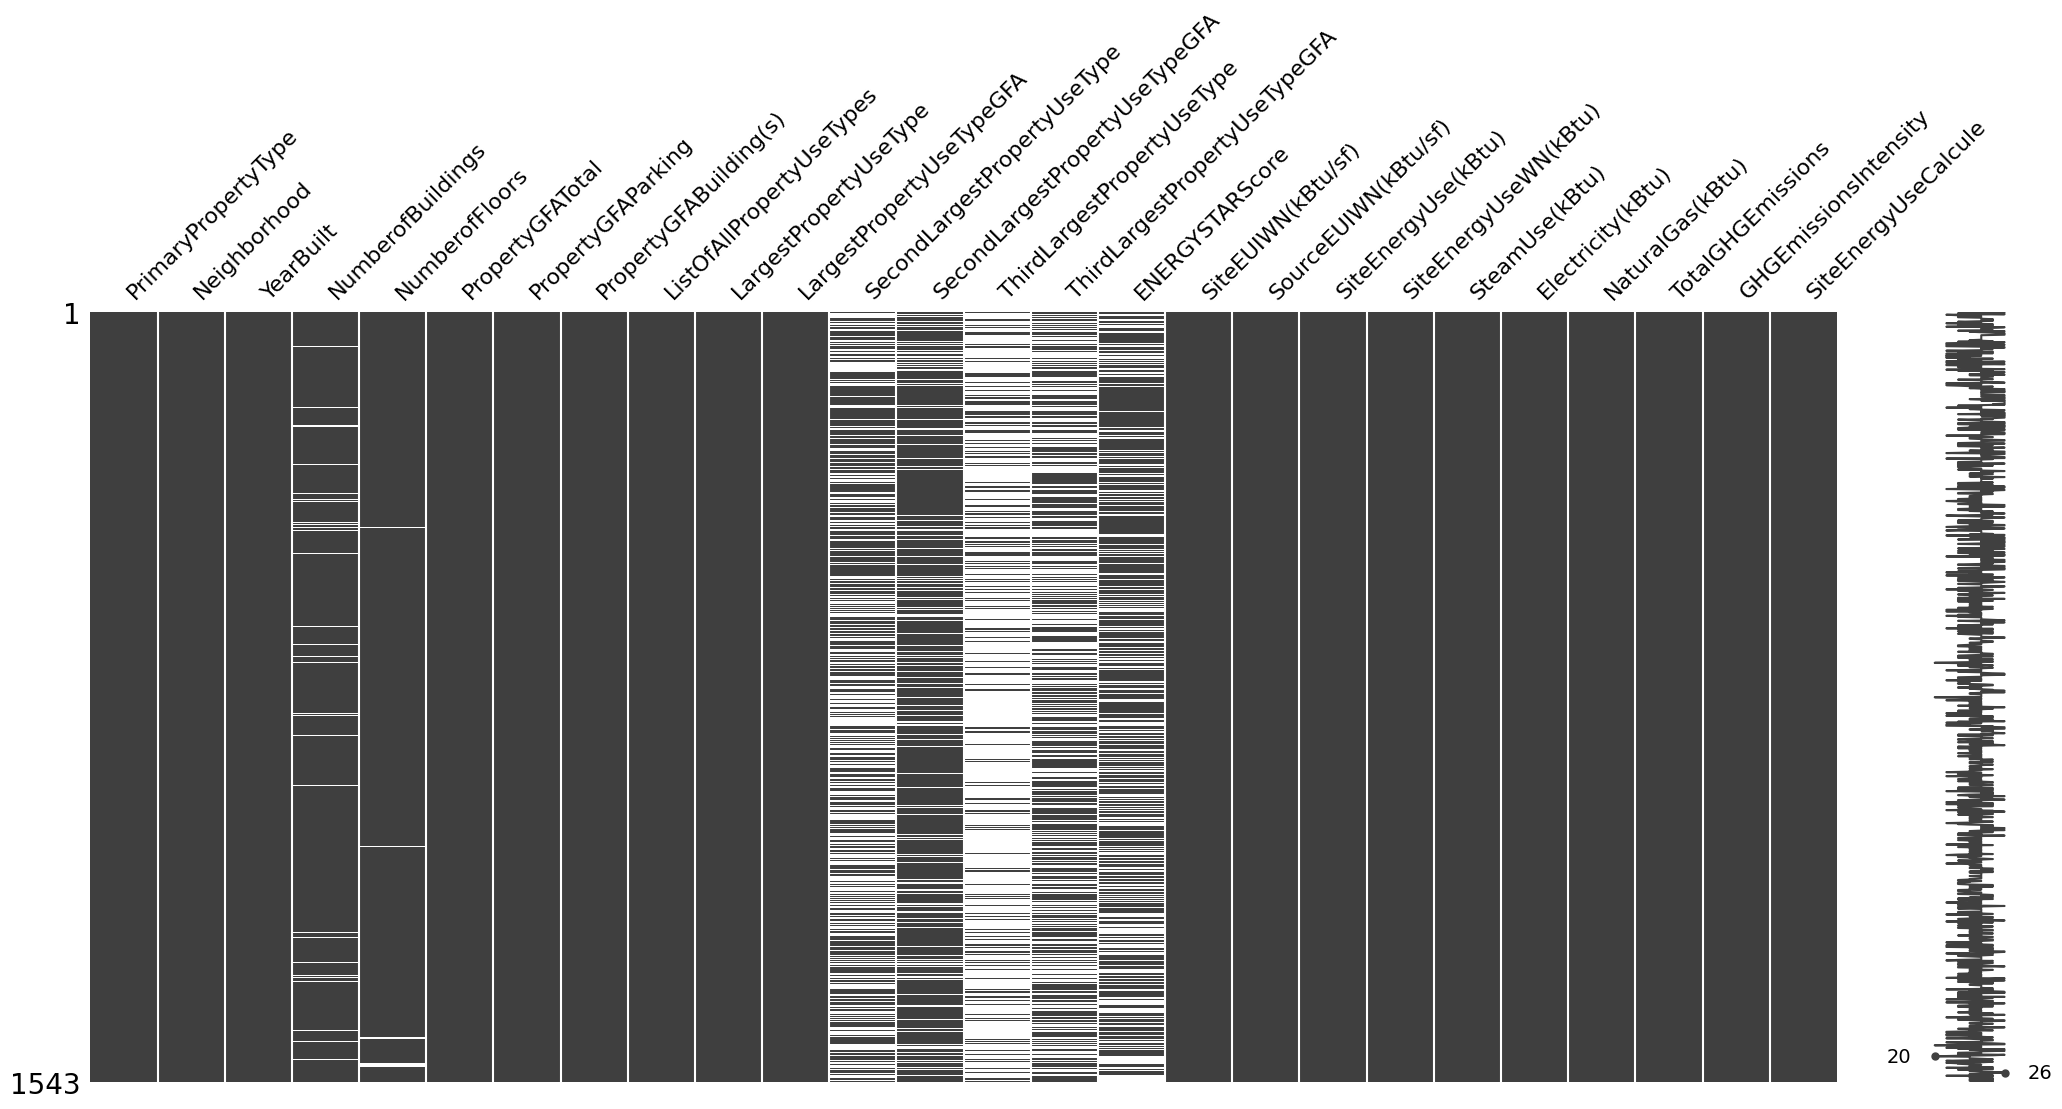

In [132]:
#Données manquantes
nan_counts = df.isna().sum()
print(nan_counts)
msno.matrix(df)

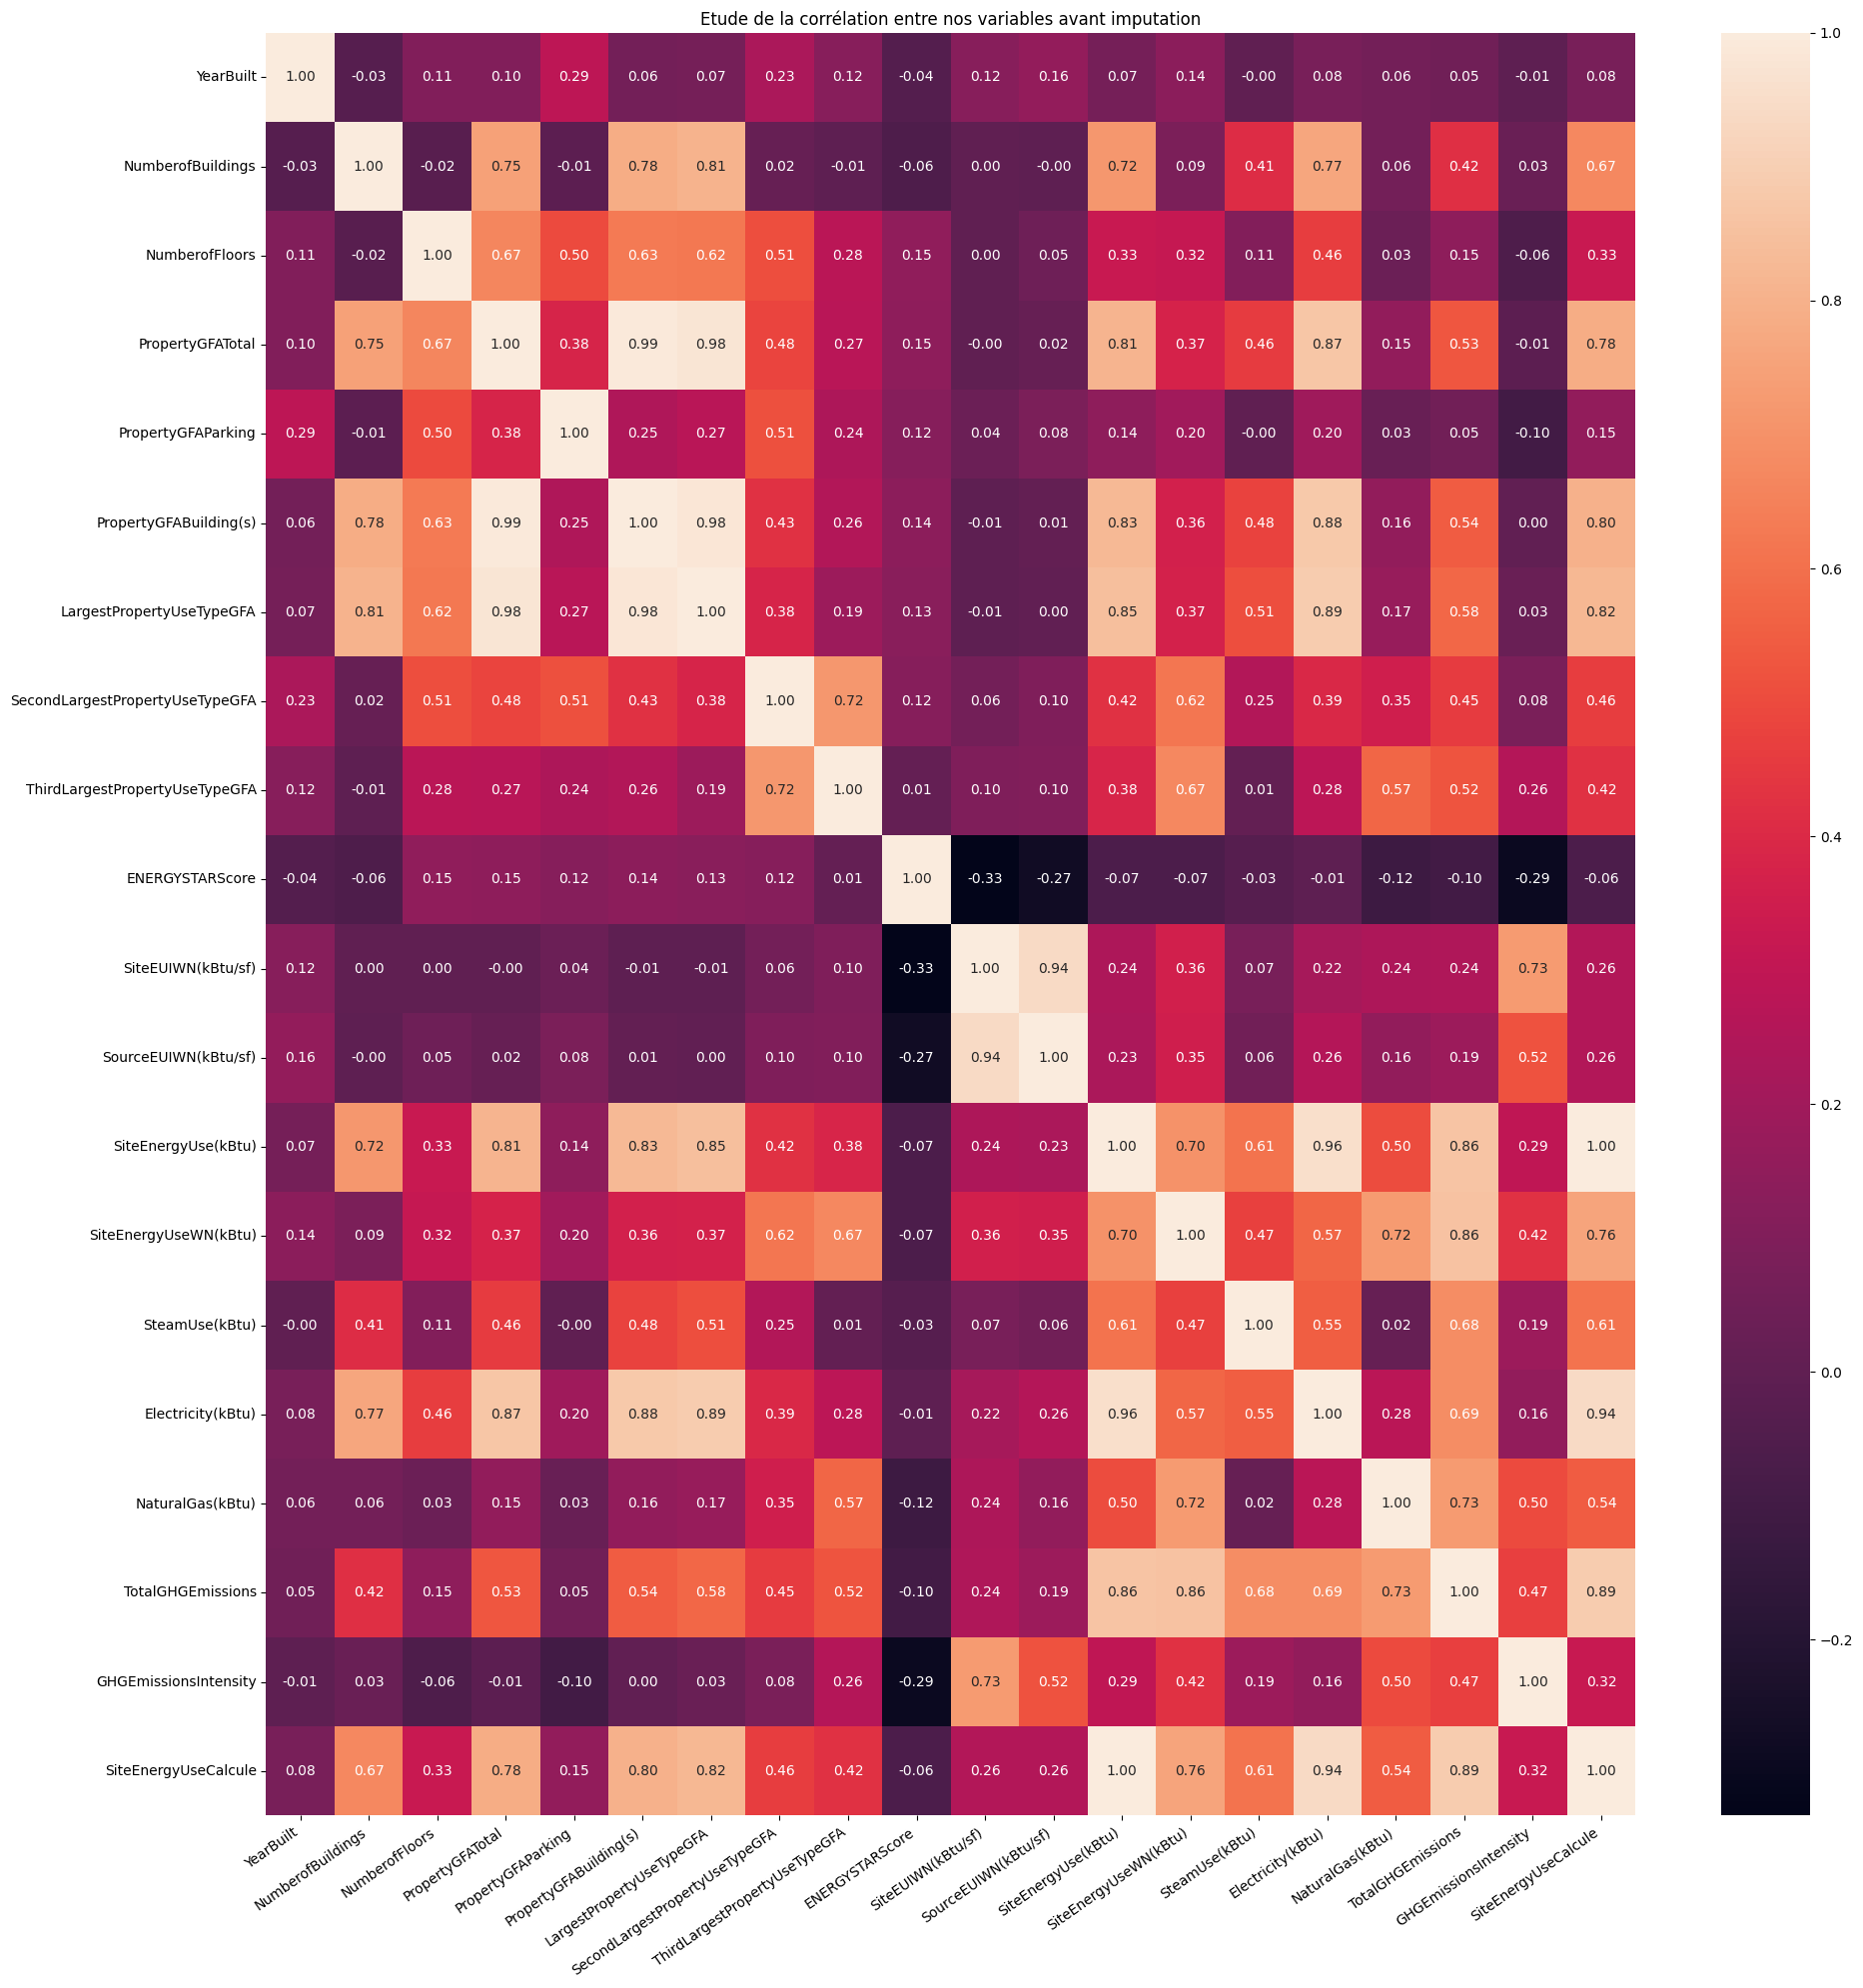

In [133]:
#Représentation graphique des données avant imputation
colonnes_quanti = df.select_dtypes(include=['float64', 'int']).columns

plt.figure(figsize=(20,20))
sns.heatmap(df[colonnes_quanti].corr(), annot=True, fmt='.2f')
plt.title('Etude de la corrélation entre nos variables avant imputation')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

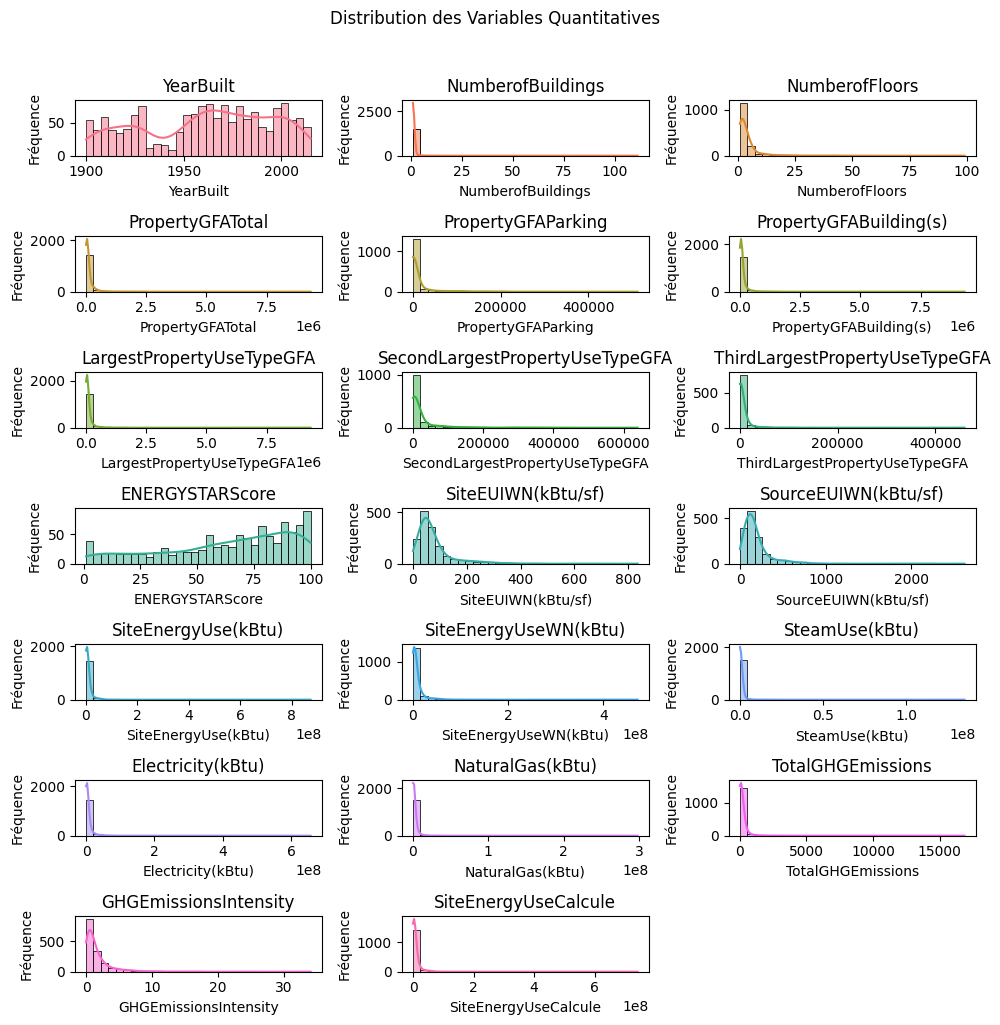

In [134]:
plt.figure(figsize=(10, 10))
palette = sns.color_palette("husl", len(colonnes_quanti))
plt.suptitle('Distribution des Variables Quantitatives', y=1.02)
for i, colonne in enumerate(colonnes_quanti):
    plt.subplot(7, 3, i+1)
    sns.histplot(df[colonne], kde=True, bins=30, color=palette[i])
    plt.title(f'{colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
    plt.tight_layout()
plt.show()

In [135]:
df.shape

(1543, 26)

### 2) Imputation par 0 et Aucun

- On considère que les lignes ayant des valeurs manquantes pour 'ThirdLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA' sont des bâtiments sans troisième fonction. On remplace les valeurs pour chaque variable respectivement par 'Aucun' et '0'. De même pour 'SecondLargestPropertyUseType' et 'SecondLargestPropertyUseTypeGFA'
- On remplace les valeurs manquantes en 'LargestPropertyUseTypeGFA' par la différence entre 'PropertyGFATotal' et 'SecondLargestPropertyUseTypeGFA' + 'ThirdLargestPropertyUseType' 

In [136]:
#Remplacer valeur nulle par 'Aucun' pour 'ThirdLargestPropertyUseType' et par '0' pour 'ThirdLargestPropertyUseTypeGFA'
third_nan = df['ThirdLargestPropertyUseType'].isna() & df['ThirdLargestPropertyUseTypeGFA'].isna()
df.loc[third_nan, 'ThirdLargestPropertyUseTypeGFA'] = 0
df.loc[third_nan, 'ThirdLargestPropertyUseType'] = 'Aucun'

#Pareil pour 'SecondLargestPropertyUseTypeGFA'
second_nan = df['SecondLargestPropertyUseType'].isna() & df['SecondLargestPropertyUseTypeGFA'].isna()
df.loc[second_nan, 'SecondLargestPropertyUseTypeGFA'] = 0
df.loc[second_nan, 'SecondLargestPropertyUseType'] = 'Aucun'

#LargestPropertyUseTypeGFA
df.loc[df['LargestPropertyUseTypeGFA'].isna(), 'LargestPropertyUseTypeGFA'] = df['PropertyGFATotal'] - (df['SecondLargestPropertyUseTypeGFA'] + df['ThirdLargestPropertyUseTypeGFA'])

nan_counts = df.isna().sum()
print(nan_counts)

PrimaryPropertyType                  0
Neighborhood                         0
YearBuilt                            0
NumberofBuildings                   52
NumberofFloors                      16
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
ListOfAllPropertyUseTypes            0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseType       428
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType        475
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    549
SiteEUIWN(kBtu/sf)                   0
SourceEUIWN(kBtu/sf)                 0
SiteEnergyUse(kBtu)                  0
SiteEnergyUseWN(kBtu)                0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(kBtu)                     0
TotalGHGEmissions                    0
GHGEmissionsIntensity                0
SiteEnergyUseCalcule     

In [137]:
#Suppression des 3 lignes sans LargestPropertyUseTypeGFA
df.dropna(subset=['LargestPropertyUseTypeGFA'], inplace=True)

### 3) Imputation KNN

In [138]:
colonnes_quanti = df.select_dtypes(include=['float64', 'int']).columns

# Imputation KNN
imputation_knn = KNNImputer(n_neighbors=7)
df[colonnes_quanti] = pd.DataFrame(imputation_knn.fit_transform(df[colonnes_quanti]), columns=colonnes_quanti, index=df.index)

print(df.isna().mean())

PrimaryPropertyType                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
NumberofBuildings                  0.000000
NumberofFloors                     0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
ListOfAllPropertyUseTypes          0.000000
LargestPropertyUseType             0.000000
LargestPropertyUseTypeGFA          0.000000
SecondLargestPropertyUseType       0.277382
SecondLargestPropertyUseTypeGFA    0.000000
ThirdLargestPropertyUseType        0.307842
ThirdLargestPropertyUseTypeGFA     0.000000
ENERGYSTARScore                    0.000000
SiteEUIWN(kBtu/sf)                 0.000000
SourceEUIWN(kBtu/sf)               0.000000
SiteEnergyUse(kBtu)                0.000000
SiteEnergyUseWN(kBtu)              0.000000
SteamUse(kBtu)                     0.000000
Electricity(kBtu)                  0.000000
NaturalGas(kBtu)                

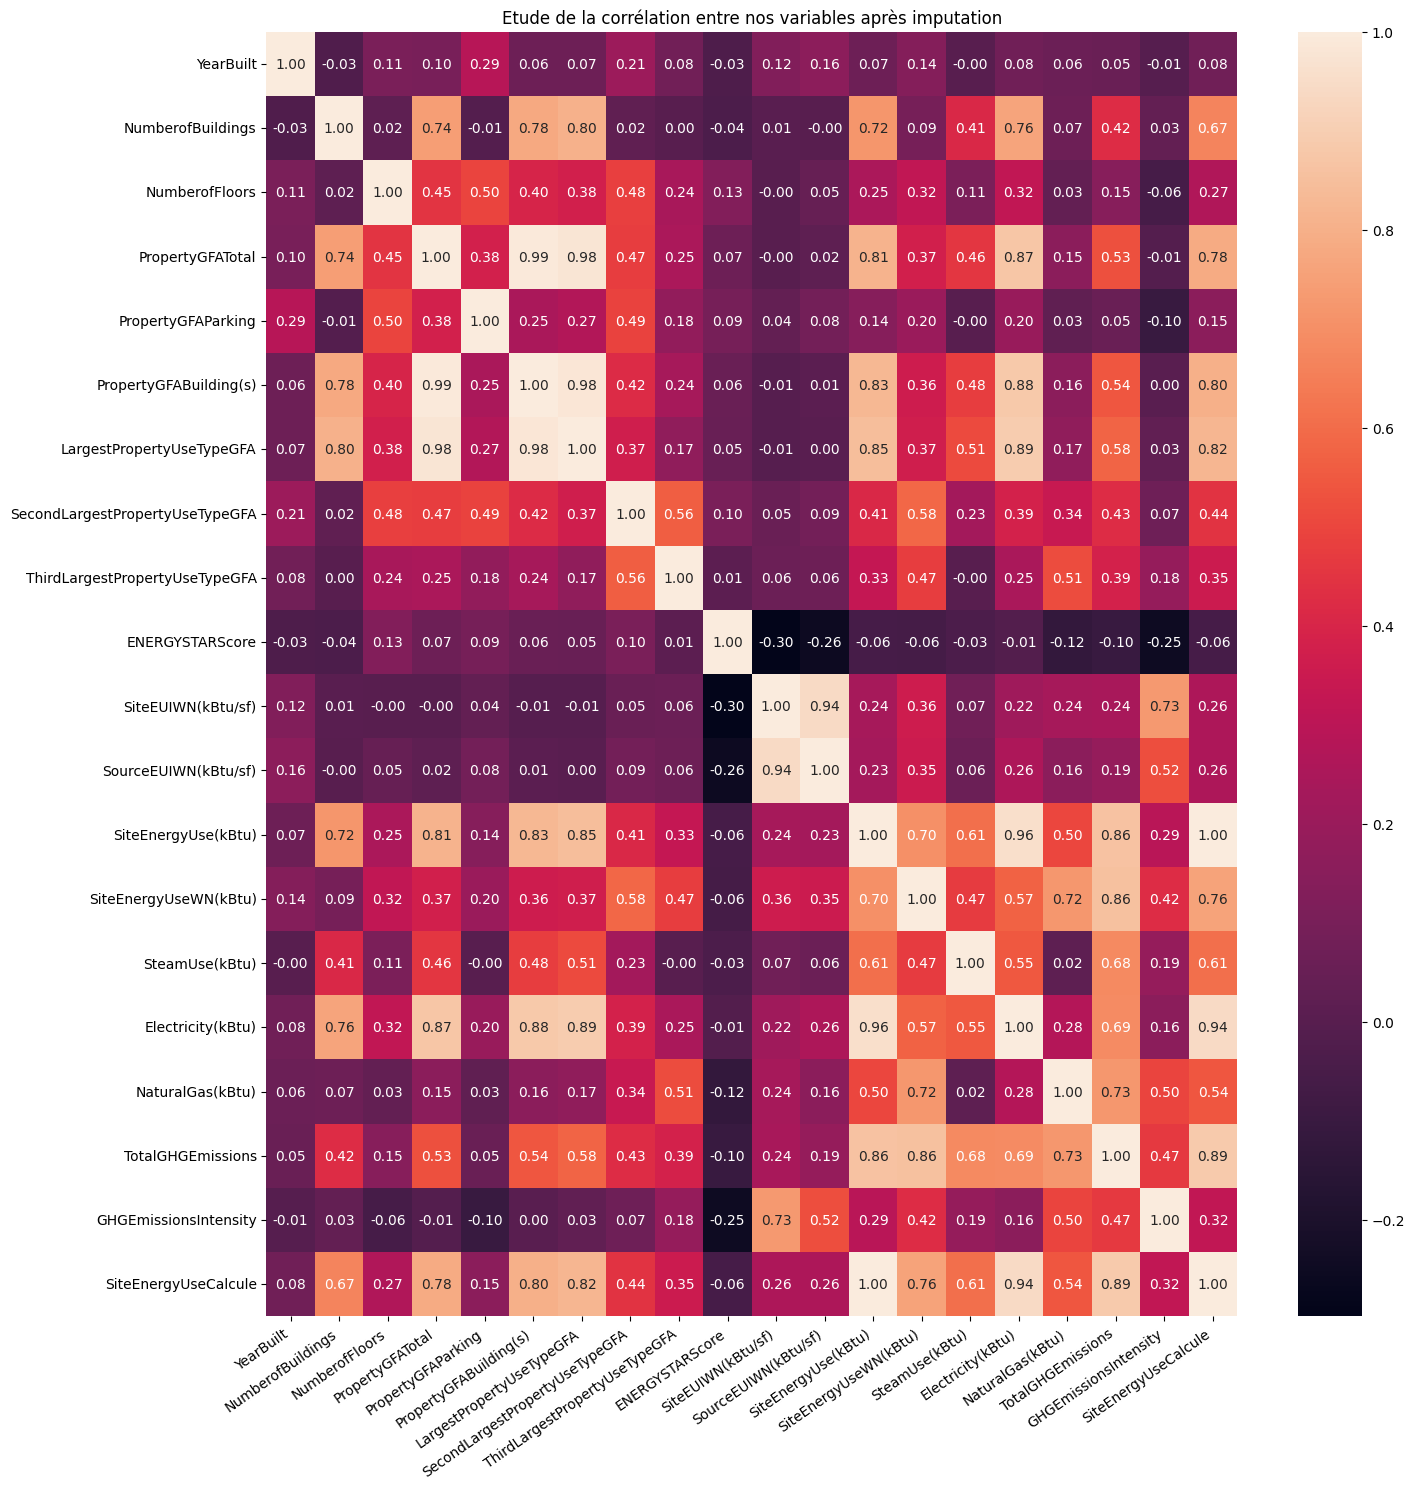

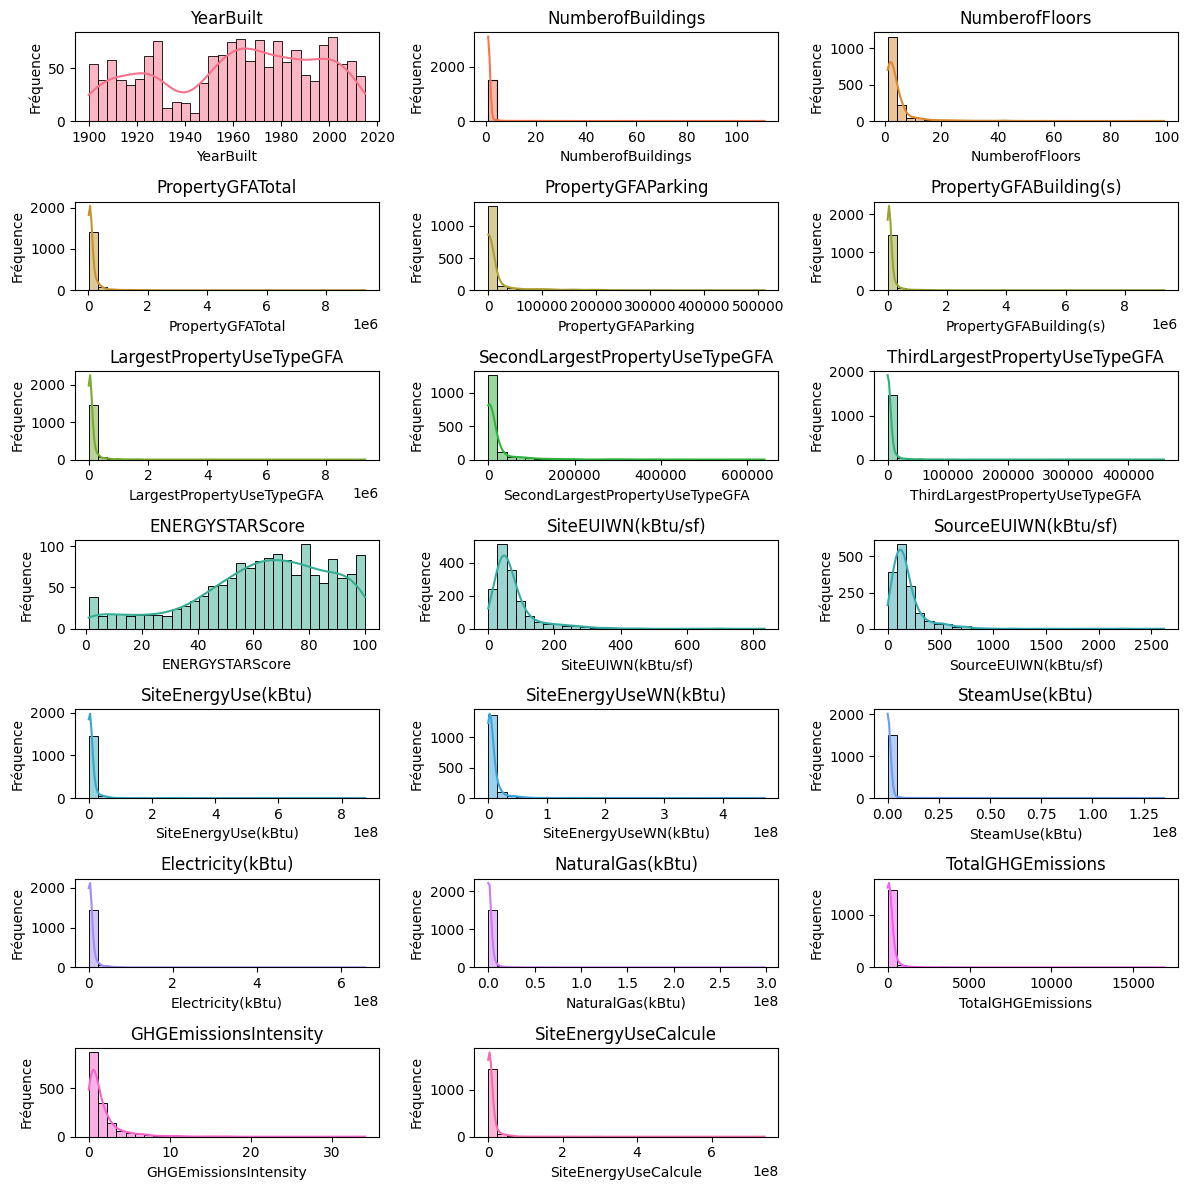

In [139]:
#Représentation graphique des données après imputation
colonnes_quanti = df.select_dtypes(include=['float64', 'int']).columns

plt.figure(figsize=(15,15))
sns.heatmap(df[colonnes_quanti].corr(), annot=True, fmt='.2f')
plt.title('Etude de la corrélation entre nos variables après imputation')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))
for i, colonne in enumerate(colonnes_quanti):
    plt.subplot(7, 3, i+1)
    sns.histplot(df[colonne], kde=True, bins=30, color=palette[i])
    plt.title(f'{colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
    plt.tight_layout()
plt.show()

Ces analyses du jeu de données mettent en évidence que l'imputation des données manquantes n'a pas entraîné de gros changement sur la tendance de nos données nettoyées, permettant de continuer avec un jeu de données complet.

## IV- Transformation des variables

### 1) Variable BuildingAge

La variable 'YearBuilt' nous donne l'année de construction ou de rénovation du bâtiment. Il serait plus intérressant d'avoir l'âge de construction ou de rénovation du bâtiment. Toutes les données étant de 2016, on créé une nouvelle colonne dans laquelle on va calculer l'âge du bâtiment.

In [140]:
#Création d'une nouvelle colonne 'BuildingAge'
df['BuildingAge'] = 2016 - df['YearBuilt']

#Suppression de la colonne 'YearBuilt'
df.drop(columns=['YearBuilt'], inplace=True)

### 2) Proportion d'utilisation de chaque source d'énergie 

Les variables 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)' seront plus intéressantes à regarder en proportion plutôt qu'en kBtu 

In [141]:
#On créé les variables en proportion
epsilon = 0.001  #Constante pour éviter la division par 0
df['SteamProportion'] = ((df['SteamUse(kBtu)']) / (df['SiteEnergyUse(kBtu)'] + epsilon))  
df['ElectricityProportion'] = (df['Electricity(kBtu)']) / (df['SiteEnergyUse(kBtu)'] + epsilon)
df['NaturalGasProportion'] = (df['NaturalGas(kBtu)']) / (df['SiteEnergyUse(kBtu)'] + epsilon)  

#On supprime les trois variables d'origine
df.drop(columns = ['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], inplace = True)
df.describe()

NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        1543.000000     1543.000000      1.543000e+03   
mean            1.225164        4.347838      1.214780e+05   
std             3.041175        6.817131      3.067720e+05   
min             1.000000        1.000000      1.128500e+04   
25%             1.000000        1.000000      2.884250e+04   
50%             1.000000        2.000000      4.811200e+04   
75%             1.000000        4.000000      1.072160e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         1543.000000            1.543000e+03               1.543000e+03   
mean         13830.705120            1.076473e+05               9.993248e+04   
std          43747.147997            2.930837e+05               2.855935e+05   
min              0.000000            3.636000e+03               5.656000e+03   
25%              0.000000            2.792050e+04               2.501050e+04   
50%              0.000000            4.606800e+04               4.195800e+04   
75%              0.000000            9.571050e+04               9.200300e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1543.000000                     1543.000000   
mean                      19332.226507                     3382.769539   
std                       52213.982997                    18654.925033   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       13000.000000                        0.000000   
max                      639931.000000                   459748.000000   

       ENERGYSTARScore  SiteEUIWN(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
count      1543.000000         1543.000000           1543.000000   
mean         63.355893           77.589631            185.599157   
std          24.563086           76.319762            188.198472   
min           1.000000            0.000000             -2.100000   
25%          49.071429           37.000000             84.350002   
50%          66.285714           56.299999            141.800003   
75%          82.000000           88.100002            215.799995   
max         100.000000          834.400024           2620.000000   

       SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
count           1.543000e+03        1543.000000            1543.000000   
mean            8.455270e+06         194.002191               1.669929   
std             2.280459e+07         780.330309               2.410969   
min             0.000000e+00          -0.800000              -0.020000   
25%             1.322090e+06          20.550000               0.360000   
50%             2.811924e+06          49.900000               0.880000   
75%             7.509929e+06         147.315000               1.970000   
max             4.716139e+08       16870.980000              34.090000   

       SiteEnergyUseCalcule  BuildingAge  SteamProportion  \
count          1.543000e+03  1543.000000      1543.000000   
mean           8.746329e+06    54.322100         0.022584   
std            2.906943e+07    32.864014         0.094192   
min           -1.154170e+05     1.000000         0.000000   
25%            1.246643e+06    27.000000         0.000000   
50%            2.701872e+06    50.000000         0.000000   
75%            7.298148e+06    86.000000         0.000000   
max            7.420596e+08   116.000000         0.766987   

       ElectricityProportion  NaturalGasProportion  
count            1543.000000           1543.000000  
mean                0.699613              0.273874  
std                 0.264834              0.264196  
min               

### 3) Proportion d'utilisation de chaque LargestPropertyUseType

Les variables 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA' seront plus intéressantes à regarder en proportion

In [142]:
#On créé les variables en proportion
df['LargestPropertyUseTypeGFAProportion'] = df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal']  
df['SecondLargestPropertyUseTypeGFAProportion'] = df['SecondLargestPropertyUseTypeGFA'] / df['PropertyGFATotal']
df['ThirdLargestPropertyUseTypeGFAProportion'] = df['ThirdLargestPropertyUseTypeGFA'] / df['PropertyGFATotal']  

#On supprime les trois variables d'origine
df.drop(columns = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'PropertyGFATotal'], inplace = True)
df.describe()

NumberofBuildings  NumberofFloors  PropertyGFAParking  \
count        1543.000000     1543.000000         1543.000000   
mean            1.225164        4.347838        13830.705120   
std             3.041175        6.817131        43747.147997   
min             1.000000        1.000000            0.000000   
25%             1.000000        1.000000            0.000000   
50%             1.000000        2.000000            0.000000   
75%             1.000000        4.000000            0.000000   
max           111.000000       99.000000       512608.000000   

       PropertyGFABuilding(s)  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  \
count            1.543000e+03      1543.000000         1543.000000   
mean             1.076473e+05        63.355893           77.589631   
std              2.930837e+05        24.563086           76.319762   
min              3.636000e+03         1.000000            0.000000   
25%              2.792050e+04        49.071429           37.000000   
50%              4.606800e+04        66.285714           56.299999   
75%              9.571050e+04        82.000000           88.100002   
max              9.320156e+06       100.000000          834.400024   

       SourceEUIWN(kBtu/sf)  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
count           1543.000000           1.543000e+03        1543.000000   
mean             185.599157           8.455270e+06         194.002191   
std              188.198472           2.280459e+07         780.330309   
min               -2.100000           0.000000e+00          -0.800000   
25%               84.350002           1.322090e+06          20.550000   
50%              141.800003           2.811924e+06          49.900000   
75%              215.799995           7.509929e+06         147.315000   
max             2620.000000           4.716139e+08       16870.980000   

       GHGEmissionsIntensity  SiteEnergyUseCalcule  BuildingAge  \
count            1543.000000          1.543000e+03  1543.000000   
mean                1.669929          8.746329e+06    54.322100   
std                 2.410969          2.906943e+07    32.864014   
min                -0.020000         -1.154170e+05     1.000000   
25%                 0.360000          1.246643e+06    27.000000   
50%                 0.880000          2.701872e+06    50.000000   
75%                 1.970000          7.298148e+06    86.000000   
max                34.090000          7.420596e+08   116.000000   

       SteamProportion  ElectricityProportion  NaturalGasProportion  \
count      1543.000000            1543.000000           1543.000000   
mean          0.022584               0.699613              0.273874   
std           0.094192               0.264834              0.264196   
min           0.000000              -0.336762              0.000000   
25%           0.000000               0.489953              0.000000   
50%           0.000000               0.705181              0.231882   
75%           0.000000               0.999988              0.489359   
max           0.766987               1.000003              1.000000   

       LargestPropertyUseTypeGFAProportion  \
count                          1543.000000   
mean                              0.861325   
std                               0.312595   
min                               0.186469   
25%                               0.672986   
50%                               0.940499   
75%                               1.000000   
max                               6.426849   

       SecondLargestPropertyUseTypeGFAProportion  \
count                                1543.000000   
mean                                    0.126327   
std                                     0.172106   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.244166   
max                                     1.452054   

       ThirdL

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PrimaryPropertyType                        1543 non-null   object 
 1   Neighborhood                               1543 non-null   object 
 2   NumberofBuildings                          1543 non-null   float64
 3   NumberofFloors                             1543 non-null   float64
 4   PropertyGFAParking                         1543 non-null   float64
 5   PropertyGFABuilding(s)                     1543 non-null   float64
 6   ListOfAllPropertyUseTypes                  1543 non-null   object 
 7   LargestPropertyUseType                     1543 non-null   object 
 8   SecondLargestPropertyUseType               1115 non-null   object 
 9   ThirdLargestPropertyUseType                1068 non-null   object 
 10  ENERGYSTARScore              

La variable 'PrimaryPropertyType' aurait pu être intérressante en proportion mais cela ne permet pas d'améliorer les modèles de prédiction. On effectue donc un One-Hot encoding.

### 4) One-hot encoding des variables qualitatives

In [144]:
# One-hot encoding des variables qualitatives
df_primary = pd.get_dummies(df['PrimaryPropertyType'], prefix='PrimaryType')
df_neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')
df = pd.concat([df, df_primary, df_neighborhood], axis=1)
df = df.drop(['PrimaryPropertyType', 'Neighborhood'], axis=1)

df.head()

NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                1.0            12.0                 0.0   
1                1.0            11.0             15064.0   
2                1.0            41.0            196718.0   
3                1.0            10.0                 0.0   
4                1.0            18.0             62000.0   

   PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                 88434.0                          Hotel   
1                 88502.0     Hotel, Parking, Restaurant   
2                759392.0                          Hotel   
3                 61320.0                          Hotel   
4                113580.0  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType SecondLargestPropertyUseType  \
0                  Hotel                          NaN   
1                  Hotel                      Parking   
2                  Hotel                        Aucun   
3                  Hotel                          NaN   
4                  Hotel                      Parking   

  ThirdLargestPropertyUseType  ENERGYSTARScore  SiteEUIWN(kBtu/sf)  ...  \
0                         NaN             60.0           84.300003  ...   
1                  Restaurant             61.0           97.900002  ...   
2                       Aucun             43.0           97.699997  ...   
3                         NaN             56.0          113.300003  ...   
4               Swimming Pool             75.0          118.699997  ...   

   PrimaryType_Worship Facility  Neighborhood_CENTRAL  Neighborhood_DOWNTOWN  \
0                         False                 False                   True   
1                         False                 False                   True   
2                         False                 False                   True   
3                         False                 False                   True   
4                         False                 False                   True   

   Neighborhood_EAST  Neighborhood_GREATER DUWAMISH  Neighborhood_LAKE UNION  \
0              False                          False                    False   
1              False                          False                    False   
2              False                          False                    False   
3              False                          False                    False   
4              False                          False                    False   

   Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTHEAST  \
0                               False                   False   
1                               False                   False   
2                               False                   False   
3                               False                   False   
4                               False                   False   

   Neighborhood_NORTHWEST  Neighborhood_SOUTHWEST  
0                   False                   False  
1                   False                   False  
2                   False                   False  
3                   False                   False  
4                   False                   False  

[5 rows x 46 columns]

### 5) Sélection des variables pour la modélisation

In [145]:
#Suppression des variables inutilisées
df.drop(columns=['ListOfAllPropertyUseTypes',
                'LargestPropertyUseType',
                'SecondLargestPropertyUseType',
                'ThirdLargestPropertyUseType',
                'SiteEUIWN(kBtu/sf)',
                'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUseCalcule'], inplace=True)

## V- Analyse exploratoire du jeu de données

In [146]:
print('Shape : ' + str(df.shape))

Shape : (1543, 39)


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543 entries, 0 to 3375
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   NumberofBuildings                          1543 non-null   float64
 1   NumberofFloors                             1543 non-null   float64
 2   PropertyGFAParking                         1543 non-null   float64
 3   PropertyGFABuilding(s)                     1543 non-null   float64
 4   ENERGYSTARScore                            1543 non-null   float64
 5   SiteEnergyUseWN(kBtu)                      1543 non-null   float64
 6   TotalGHGEmissions                          1543 non-null   float64
 7   BuildingAge                                1543 non-null   float64
 8   SteamProportion                            1543 non-null   float64
 9   ElectricityProportion                      1543 non-null   float64
 10  NaturalGasProportion         

In [148]:
df.describe()

NumberofBuildings  NumberofFloors  PropertyGFAParking  \
count        1543.000000     1543.000000         1543.000000   
mean            1.225164        4.347838        13830.705120   
std             3.041175        6.817131        43747.147997   
min             1.000000        1.000000            0.000000   
25%             1.000000        1.000000            0.000000   
50%             1.000000        2.000000            0.000000   
75%             1.000000        4.000000            0.000000   
max           111.000000       99.000000       512608.000000   

       PropertyGFABuilding(s)  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
count            1.543000e+03      1543.000000           1.543000e+03   
mean             1.076473e+05        63.355893           8.455270e+06   
std              2.930837e+05        24.563086           2.280459e+07   
min              3.636000e+03         1.000000           0.000000e+00   
25%              2.792050e+04        49.071429           1.322090e+06   
50%              4.606800e+04        66.285714           2.811924e+06   
75%              9.571050e+04        82.000000           7.509929e+06   
max              9.320156e+06       100.000000           4.716139e+08   

       TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  SteamProportion  \
count        1543.000000            1543.000000  1543.000000      1543.000000   
mean          194.002191               1.669929    54.322100         0.022584   
std           780.330309               2.410969    32.864014         0.094192   
min            -0.800000              -0.020000     1.000000         0.000000   
25%            20.550000               0.360000    27.000000         0.000000   
50%            49.900000               0.880000    50.000000         0.000000   
75%           147.315000               1.970000    86.000000         0.000000   
max         16870.980000              34.090000   116.000000         0.766987   

       ElectricityProportion  NaturalGasProportion  \
count            1543.000000           1543.000000   
mean                0.699613              0.273874   
std                 0.264834              0.264196   
min                -0.336762              0.000000   
25%                 0.489953              0.000000   
50%                 0.705181              0.231882   
75%                 0.999988              0.489359   
max                 1.000003              1.000000   

       LargestPropertyUseTypeGFAProportion  \
count                          1543.000000   
mean                              0.861325   
std                               0.312595   
min                               0.186469   
25%                               0.672986   
50%                               0.940499   
75%                               1.000000   
max                               6.426849   

       SecondLargestPropertyUseTypeGFAProportion  \
count                                1543.000000   
mean                                    0.126327   
std                                     0.172106   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.244166   
max                                     1.452054   

       ThirdLargestPropertyUseTypeGFAProportion  
count                               1543.000000  
mean                                   0.023222  
std                                    0.063820  
min                                    0.000000  
25%                                    0.000000  
50%                                    0.000000  
75%                                    0.000000  
max                                    0.929094

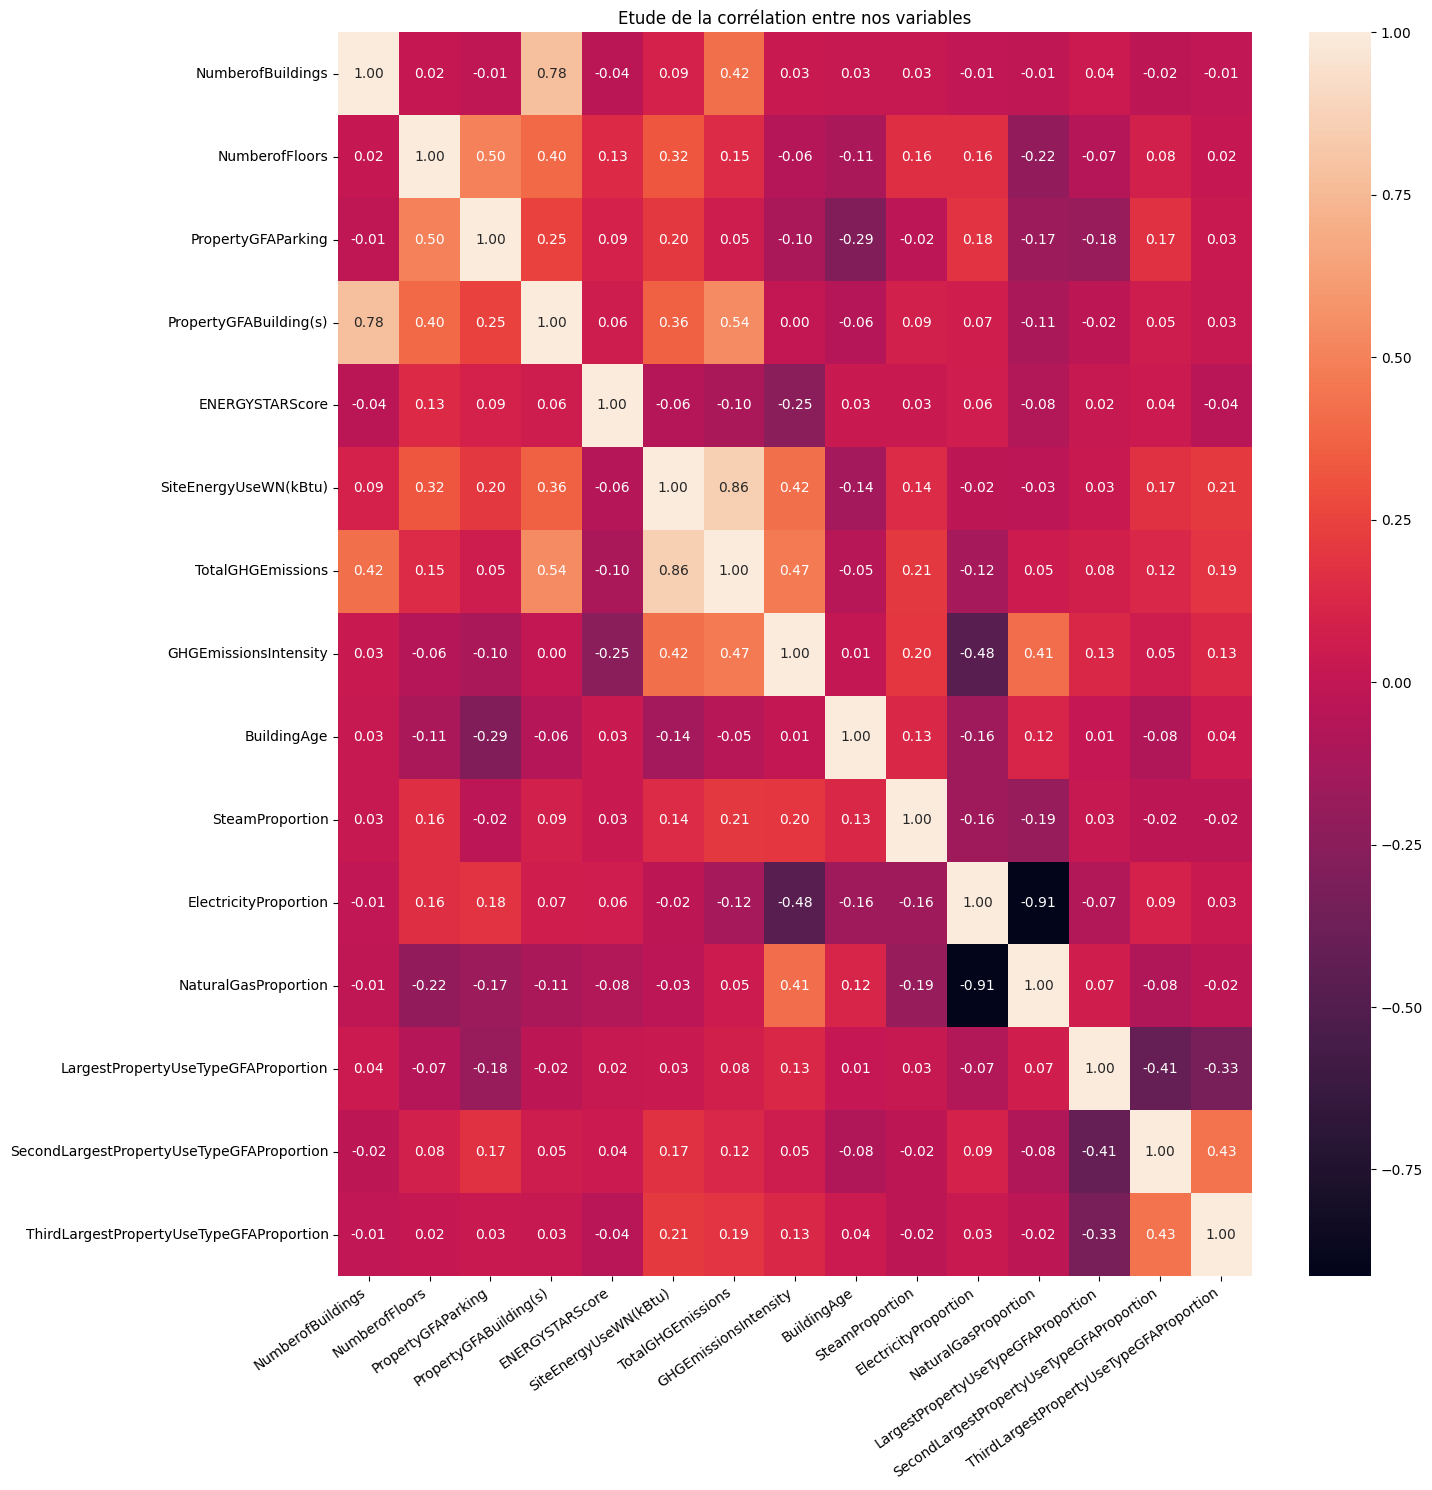

In [149]:
colonnes_quanti = df.select_dtypes(include=['float64', 'int']).columns

#Matrice de corrélation
plt.figure(figsize=(15,15))
sns.heatmap(df[colonnes_quanti].corr(), annot=True, fmt='.2f')
plt.title('Etude de la corrélation entre nos variables')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

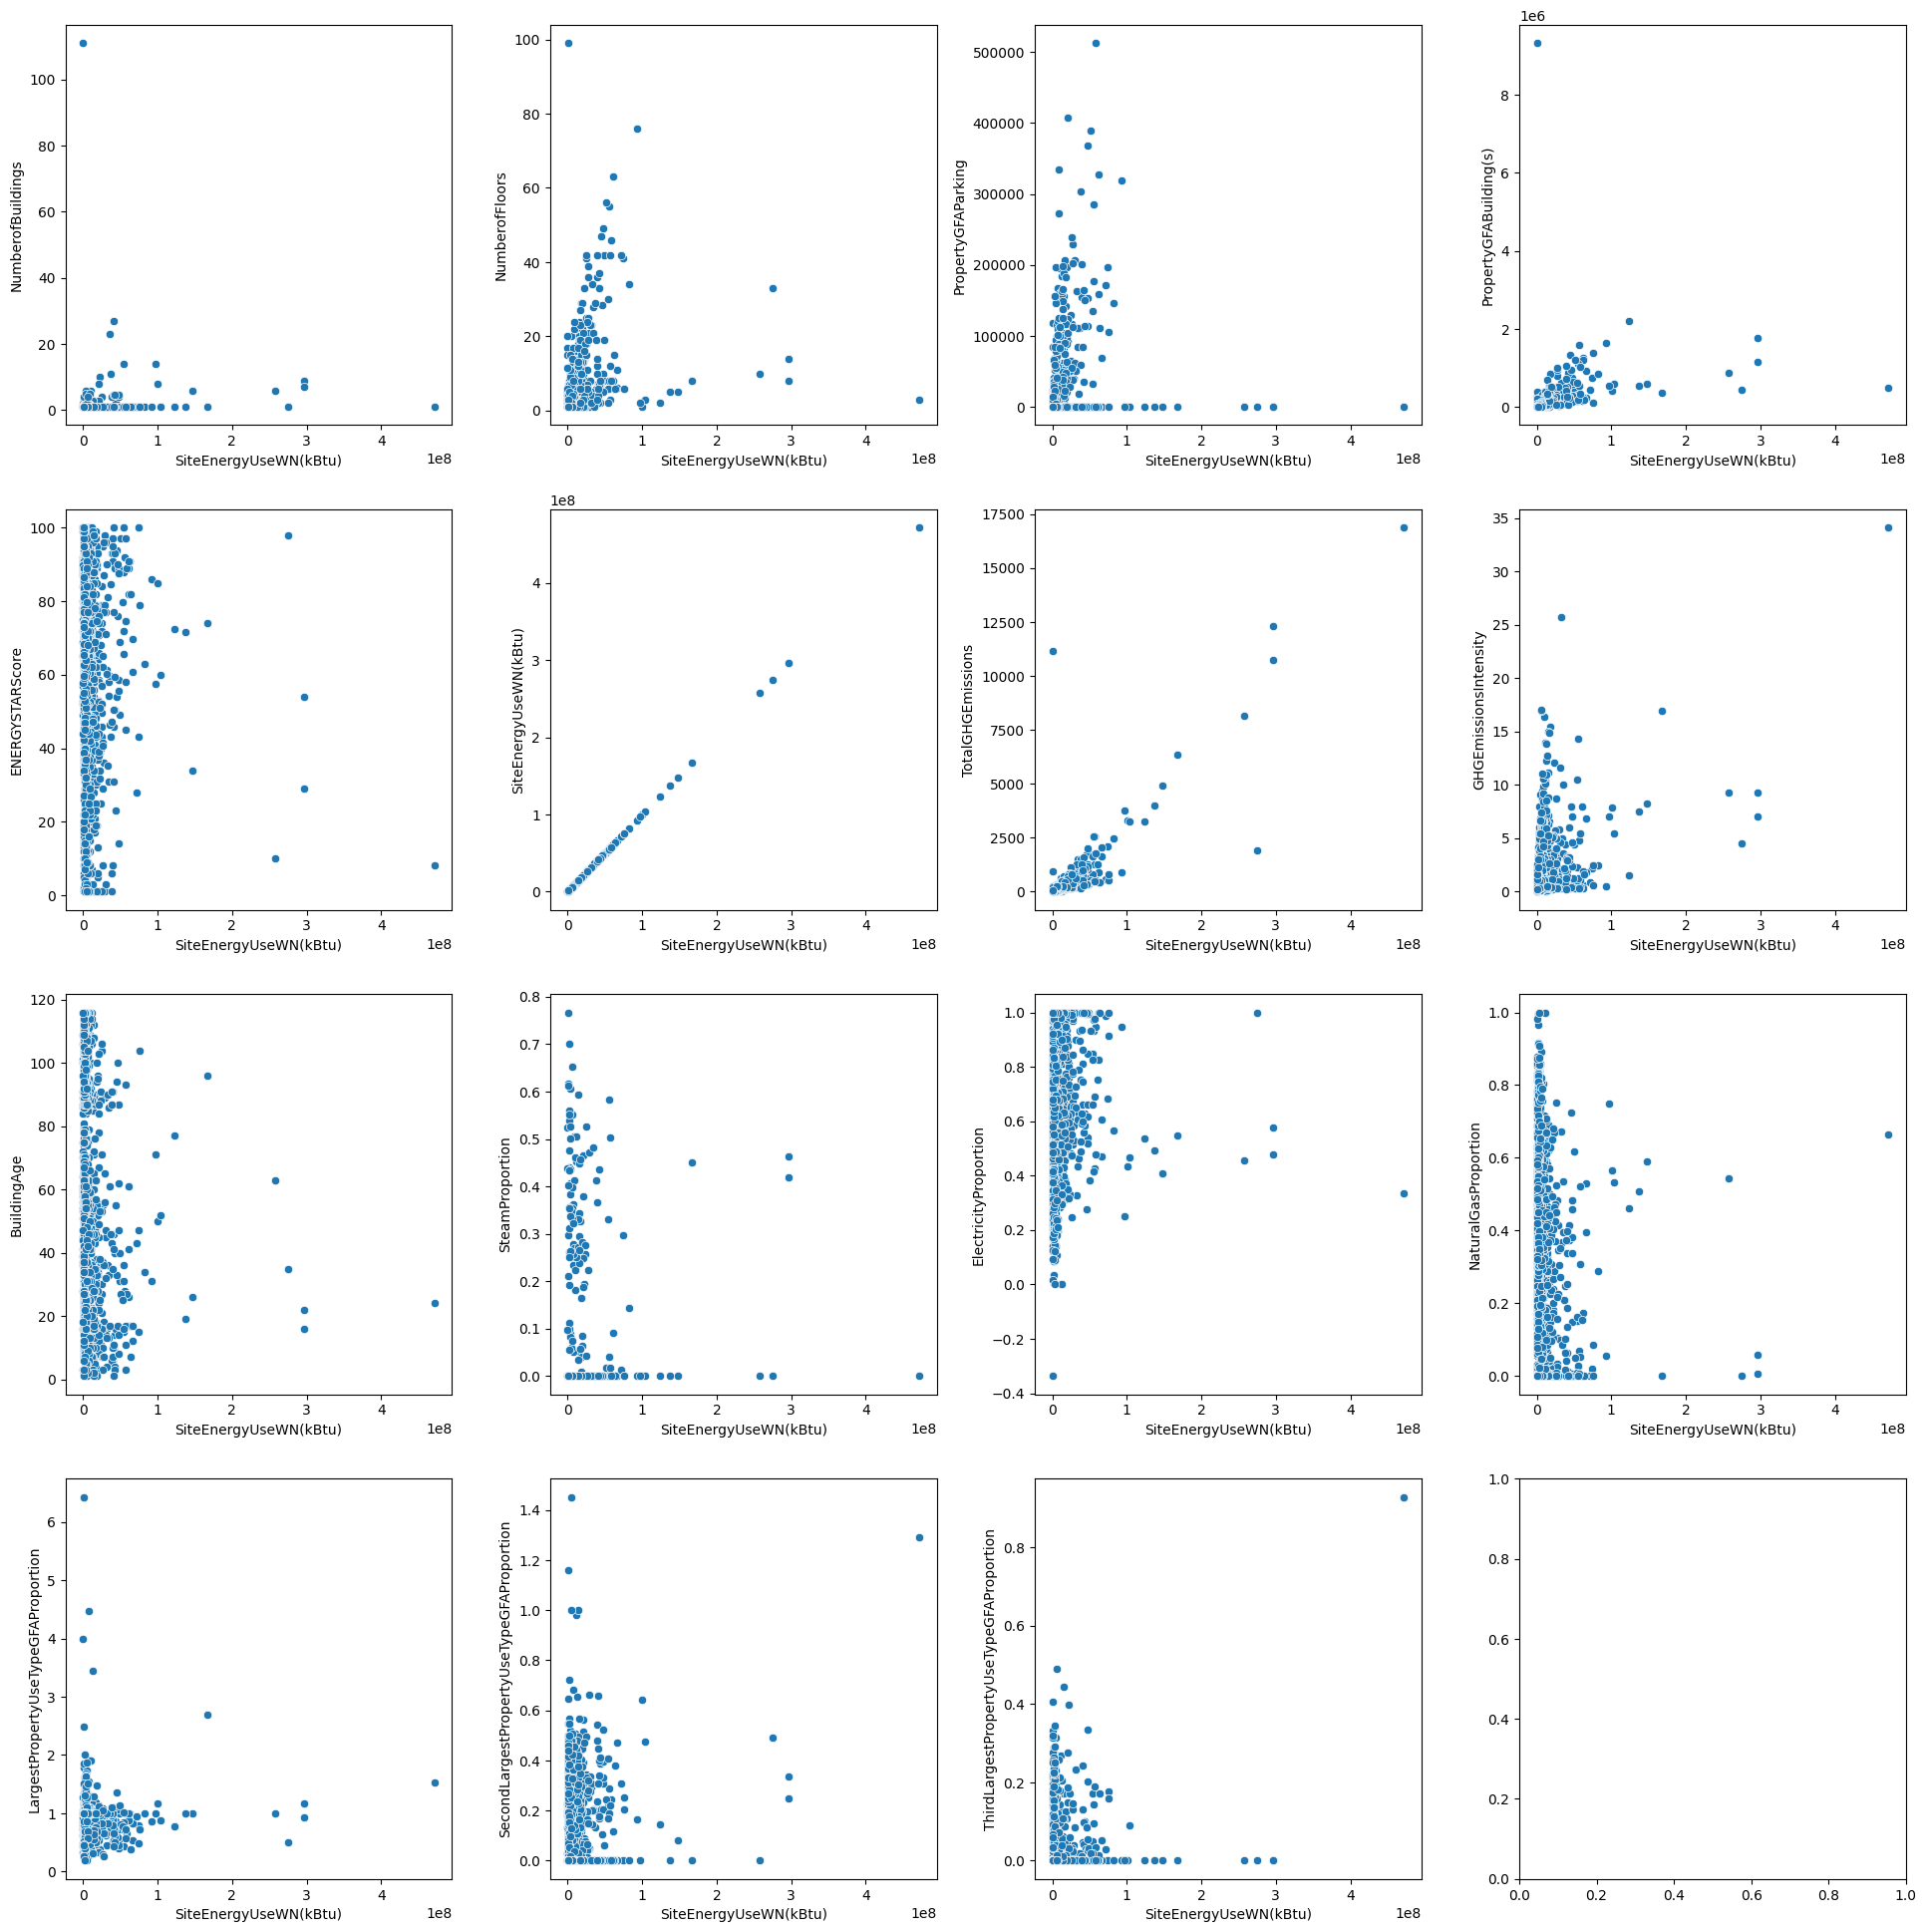

In [150]:
# Scatterplot entre 'SiteEnergyUseWN(kBtu)' et les autres variables
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout(pad=4.0)
for i, variable in enumerate(colonnes_quanti):
    row = i // 4
    col = i % 4
    ax = axes[row, col] if 4 > 1 else axes[col]
    
    sns.scatterplot(x='SiteEnergyUseWN(kBtu)', y=variable, data=df, ax=ax)

plt.show()

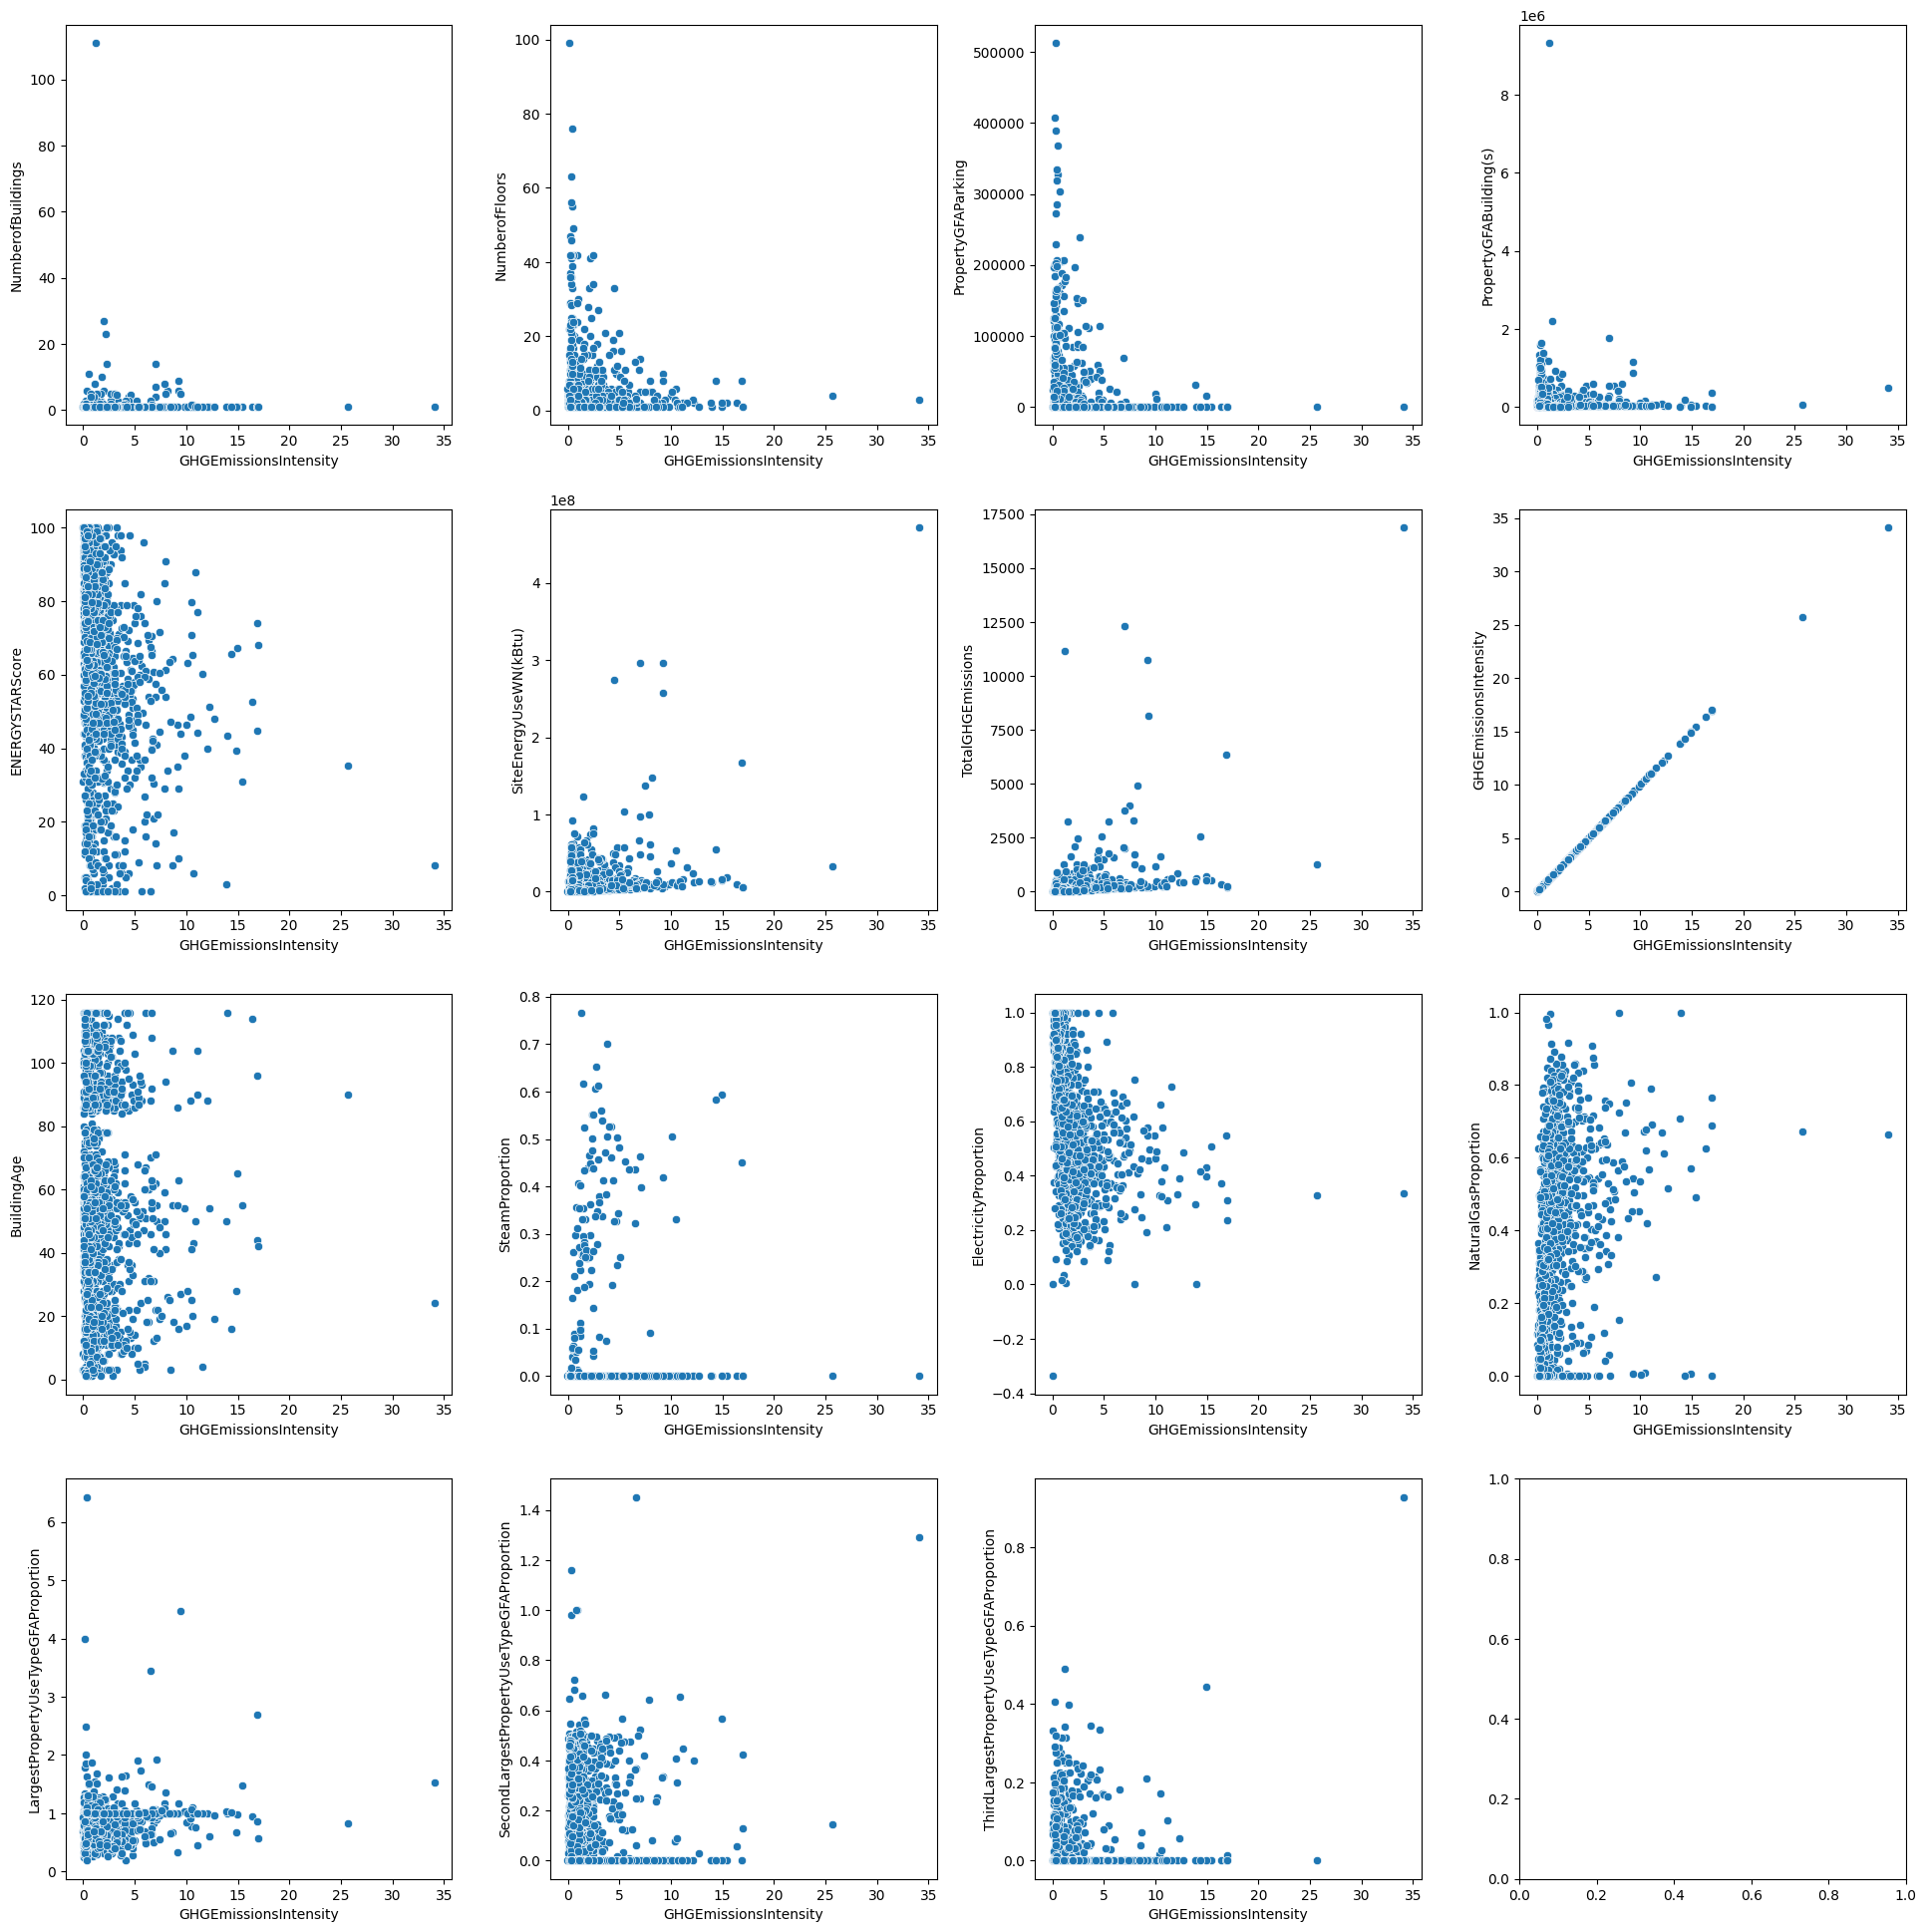

In [151]:
# Scatterplot entre 'TotalGHGEmissionsIntensity' et les autres variables
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout(pad=4.0)
for i, variable in enumerate(colonnes_quanti):
    row = i // 4
    col = i % 4
    ax = axes[row, col] if 4 > 1 else axes[col]
    
    sns.scatterplot(x='GHGEmissionsIntensity', y=variable, data=df, ax=ax)

plt.show()

#Suppression de GHGEmissionsIntensity
df.drop(columns=['GHGEmissionsIntensity'], inplace=True)

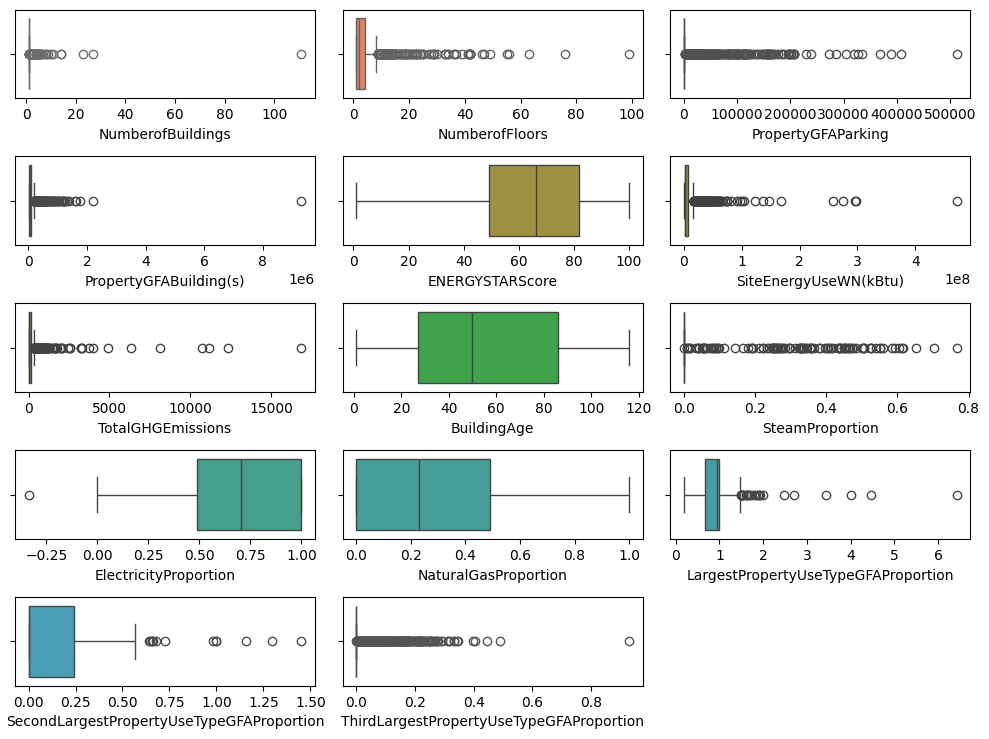

In [152]:
colonnes_quanti = df.select_dtypes(include=['float64', 'int']).columns

#Boxplot pour chaque variable
plt.figure(figsize=(10, 10))
for i, colonne in enumerate(colonnes_quanti):
    plt.subplot(7, 3, i+1)
    sns.boxplot(x=df[colonne], color=palette[i])
plt.tight_layout()
plt.show()

In [153]:
# Effectuer le test de Shapiro-Wilk
for colonne in colonnes_quanti:
    stat, p_value = shapiro(df[colonne])

    # Interprétation des résultats
    alpha = 0.05
    print(f"Test de Shapiro-Wilk pour {colonne}:")
    print(f"Statistique de test : {stat}")
    print(f"Valeur p : {p_value}")

    if p_value > alpha:
        print("Les données suivent une distribution normale (on ne peut pas rejeter l'hypothèse nulle)")
    else:
        print("Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle)")

Test de Shapiro-Wilk pour NumberofBuildings:
Statistique de test : 0.04362177848815918
Valeur p : 0.0
Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle)
Test de Shapiro-Wilk pour NumberofFloors:
Statistique de test : 0.4554809331893921
Valeur p : 0.0
Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle)
Test de Shapiro-Wilk pour PropertyGFAParking:
Statistique de test : 0.36047977209091187
Valeur p : 0.0
Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle)
Test de Shapiro-Wilk pour PropertyGFABuilding(s):
Statistique de test : 0.22183704376220703
Valeur p : 0.0
Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle)
Test de Shapiro-Wilk pour ENERGYSTARScore:
Statistique de test : 0.9503225684165955
Valeur p : 1.9527332843563746e-22
Les données ne suivent pas une distribution normale (on rejette l'hypothèse nulle)
Test de Shapiro-Wilk pour SiteEnergyUseWN(kBtu):
Statisti

In [154]:
X = df[['SteamProportion',
       'ElectricityProportion',
       'NaturalGasProportion',
       'SiteEnergyUseWN(kBtu)',
       'TotalGHGEmissions']]
  
# VIF  
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                 feature       VIF
0        SteamProportion  1.092040
1  ElectricityProportion  1.431246
2   NaturalGasProportion  1.286085
3  SiteEnergyUseWN(kBtu)  4.399344
4      TotalGHGEmissions  4.232971


## On enregistre les données

In [155]:
df.to_csv('Data_Cleaned.csv', index=False)